# Klasifikasi menggunakan 1D CNN/1000 win



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Skripsi_naufal/data_train.csv')
df

,data,fault
0,-0.08,1_P
1,-0.15,1_P
2,-0.15,1_P
3,-0.15,1_P
4,0.00,1_P
...,...,...
182572,-0.38,N
182573,-0.11,N
182574,-0.11,N
182575,-0.11,N


In [ ]:
# Count the occurrences of each class in the 'fault' column
class_counts = df['fault'].value_counts()

# Print the counts
print(class_counts)

2_K3DRJ    20593
2DRJ_A     20411
3DRJ_A     20398
1_P        20314
3_K2DRJ    20217
2_P        20216
N          20192
3_P        20131
1_K2DRJ    20105
Name: fault, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182577 entries, 0 to 182576
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    182577 non-null  float64
 1   fault   182577 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


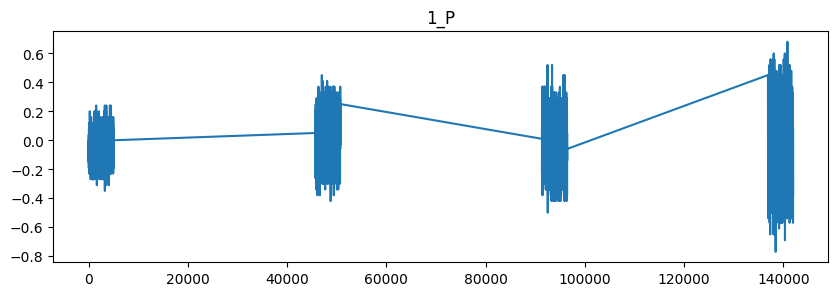

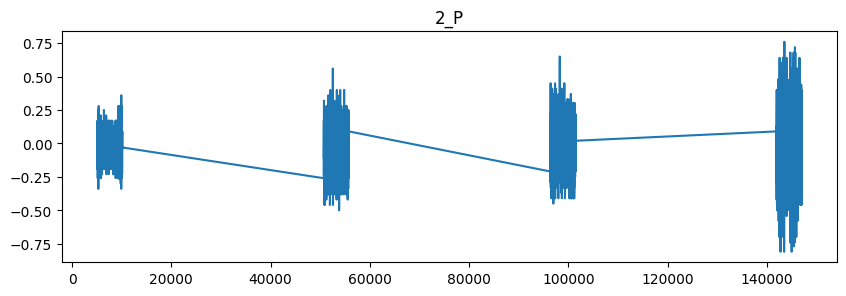

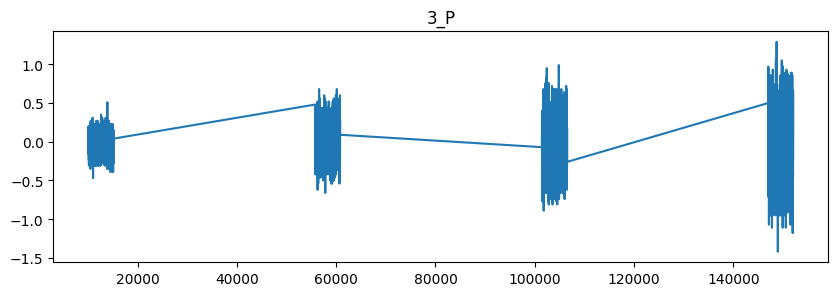

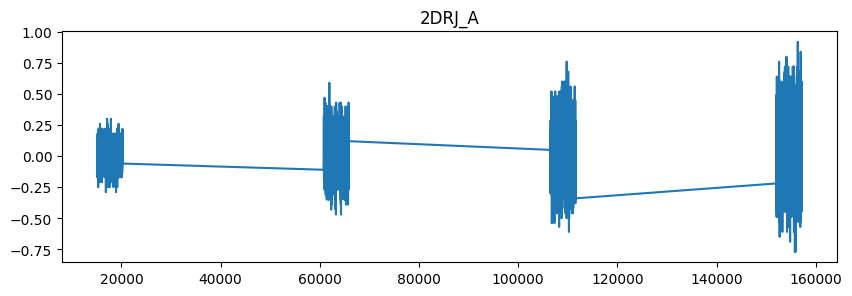

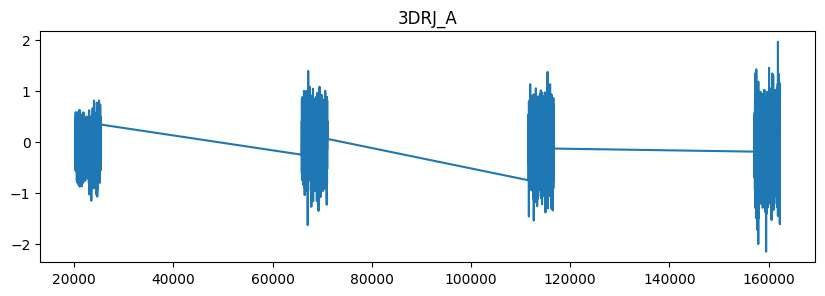

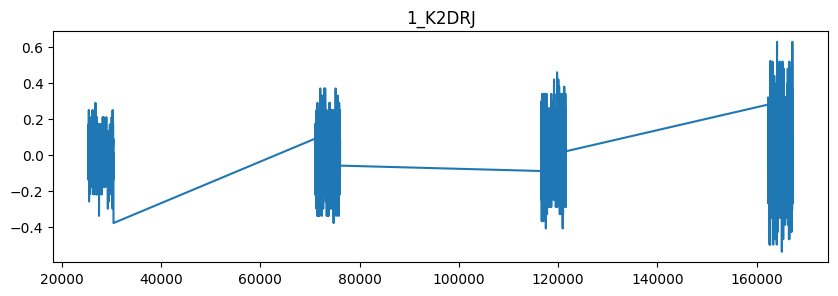

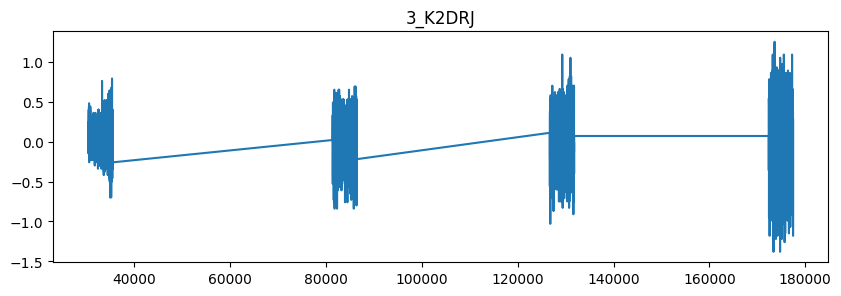

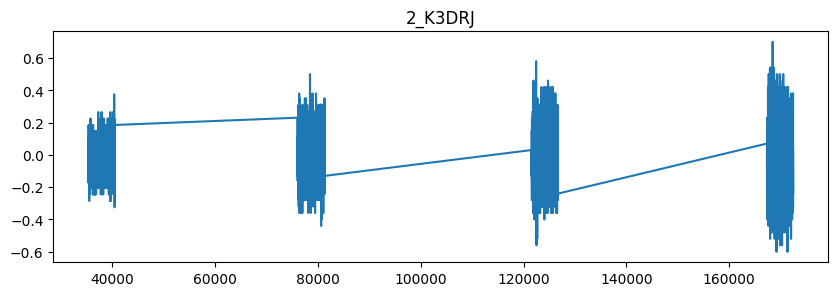

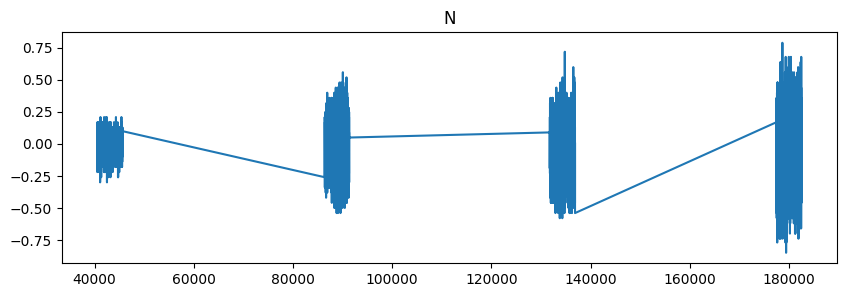

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [ ]:
faults = df['data'].unique()

# menampilkan nilai unik pada kolom 'fault'
print(faults)

[-0.08  -0.15   0.    -0.04   0.04  -0.19   0.08   0.12  -0.11  -0.23
  0.2    0.16  -0.27   0.24  -0.31  -0.35   0.01   0.09  -0.03  -0.07
  0.13   0.17   0.05  -0.26  -0.11   0.25  -0.34   0.28   0.21  -0.3
  0.36   0.2   -0.16  -0.12   0.16   0.12  -0.24  -0.28  -0.2    0.23
  0.27   0.31  -0.47   0.35   0.51  -0.39  -0.1    0.06  -0.02  -0.17
 -0.06   0.02   0.1    0.14   0.18  -0.14  -0.25   0.22  -0.21   0.26
 -0.29   0.3   -0.05   0.46  -0.09   0.07  -0.13   0.03  -0.33  -0.56
  0.58  -0.01   0.34   0.15   0.38  -0.36   0.11  -0.44  -0.4   -0.76
 -0.52  -0.8   -0.6   -0.64  -0.72  -0.84   0.62  -0.48  -0.87  -0.68
  0.42   0.5    0.54  -1.03  -1.15   0.66  -0.91   0.81   0.77  -0.95
 -1.07   0.73   0.01  -0.03  -0.14  -0.07   0.13   0.05  -0.1   -0.26
 -0.22   0.09  -0.18   0.29  -0.34  -0.3   -0.38   0.4    0.44   0.48
  0.32   0.76  -0.42  -0.38   0.52   0.6    0.64  -0.46  -0.5   -0.7
  0.56   0.68   0.79  -0.055 -0.175 -0.015  0.105 -0.095  0.185  0.065
  0.025 -0.135  0.145

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=50

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))

encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)


In [ ]:
print(encoded_Y)
print(Y)

[1 1 1 ... 8 8 8]
['1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '

In [ ]:
X.shape

(3476, 1000, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [ ]:
X_train.shape

(2780, 1000, 1)

In [ ]:
X_val.shape

(696, 1000, 1)

In [ ]:
y_train.shape

(2780, 9)

In [ ]:
y_val.shape

(696, 9)

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the number of classes
no_classes = len(df['fault'].unique())

# Define the search space
pbounds = {'filters': (16, 128),
           'kernel_size': (10, 100),
           'dense_units': (10, 200),
           'dropout_rate': (0.1, 0.5)}

# Define the objective function
def cnn_objective(filters, kernel_size, dense_units, dropout_rate):
    # Create the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=int(filters), kernel_size=int(kernel_size), activation='relu', input_shape=(X.shape[1], X.shape[2])))
    cnn_model.add(Conv1D(filters=int(filters/2), kernel_size=int(kernel_size/2), activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=4))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(int(dense_units), activation='relu'))
    cnn_model.add(Dropout(dropout_rate))
    cnn_model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=300, validation_data=(X_train, y_train), callbacks=[EarlyStopping(patience=3)])

    # Evaluate the model
    loss, accuracy = cnn_model.evaluate(X_val, y_val)


    return accuracy

# Create the Bayesian optimizer
optimizer = BayesianOptimization(f=cnn_objective, pbounds=pbounds, random_state=1)

# Run the optimization
optimizer.maximize(n_iter=3)

# Get the best hyperparameters and iteration
best_params = optimizer.max['params']
best_iteration = optimizer.max['target']

print('Best hyperparameters:', best_params)
print('Best iteration:', best_iteration)


|   iter    |  target   | dense_... | dropou... |  filters  | kernel... |
-------------------------------------------------------------------------
Epoch 1/50
10/10 [==============================] - 9s 208ms/step - loss: 2.1534 - accuracy: 0.1065 - val_loss: 2.0979 - val_accuracy: 0.1126
Epoch 2/50
10/10 [==============================] - 1s 59ms/step - loss: 2.0702 - accuracy: 0.1324 - val_loss: 1.9966 - val_accuracy: 0.1626
Epoch 3/50
10/10 [==============================] - 1s 52ms/step - loss: 1.9543 - accuracy: 0.2040 - val_loss: 1.8108 - val_accuracy: 0.3288
Epoch 4/50
10/10 [==============================] - 0s 39ms/step - loss: 1.7420 - accuracy: 0.3342 - val_loss: 1.5344 - val_accuracy: 0.3759
Epoch 5/50
10/10 [==============================] - 0s 45ms/step - loss: 1.5179 - accuracy: 0.3953 - val_loss: 1.3086 - val_accuracy: 0.5022
Epoch 6/50
10/10 [==============================] - 0s 30ms/step - loss: 1.3754 - accuracy: 0.4529 - val_loss: 1.1761 - val_accuracy: 0.5932
Epoch

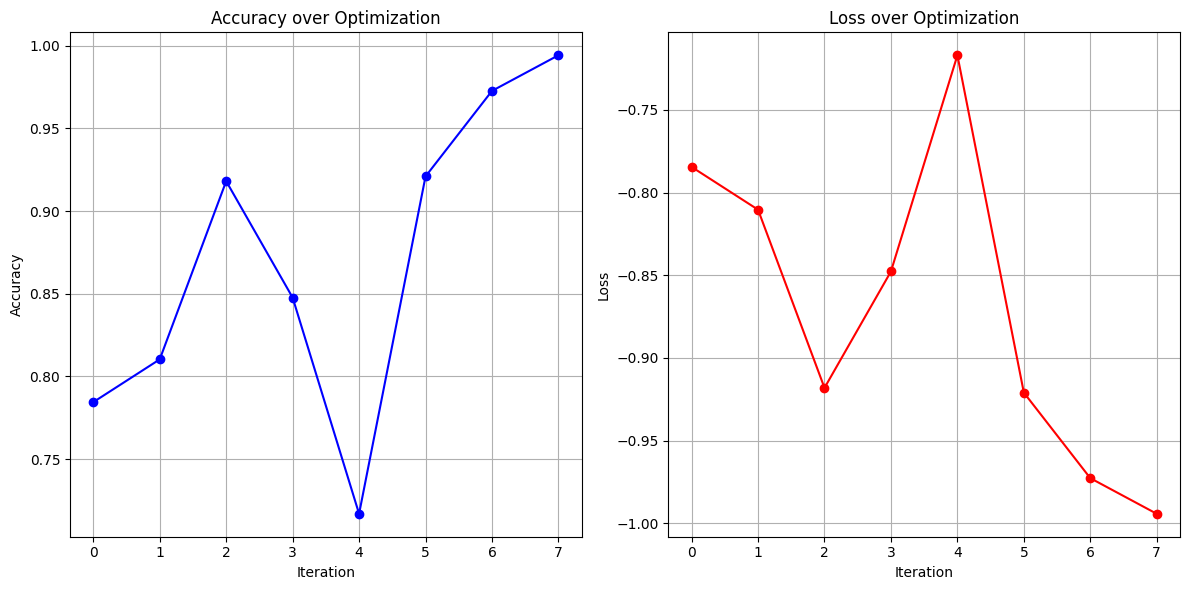

In [ ]:
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss selama optimisasi
iterations = []
accuracies = []
losses = []

for i, res in enumerate(optimizer.res):
    iterations.append(i)
    accuracies.append(res['target'])
    # BayesOpt tidak meminimalkan loss, maka diambil nilai negatif
    losses.append(-res['target'])

# Membuat plot akurasi
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

# Membuat plot loss
plt.subplot(122)
plt.plot(iterations, losses, marker='o', linestyle='-', color='r')
plt.title('Loss over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Train the model using the best hyperparameters
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=int(best_params['filters']), kernel_size=int(best_params['kernel_size']), activation='relu', input_shape=(X.shape[1], X.shape[2])))
cnn_model.add(Conv1D(filters=int(best_params['filters']/2), kernel_size=int(best_params['kernel_size']/2), activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(int(best_params['dense_units']), activation='relu'))
cnn_model.add(Dropout(best_params['dropout_rate']))
cnn_model.add(Dense(no_classes, activation='softmax'))

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#, callbacks=[early_stop]

# Train the model
best_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=300, validation_data=(X_train, y_train))


Epoch 1/50
10/10 [==============================] - 3s 133ms/step - loss: 2.0552 - accuracy: 0.1694 - val_loss: 1.8168 - val_accuracy: 0.3047
Epoch 2/50
10/10 [==============================] - 1s 106ms/step - loss: 1.7110 - accuracy: 0.3277 - val_loss: 1.5024 - val_accuracy: 0.4043
Epoch 3/50
10/10 [==============================] - 1s 109ms/step - loss: 1.4044 - accuracy: 0.4403 - val_loss: 1.1902 - val_accuracy: 0.5842
Epoch 4/50
10/10 [==============================] - 1s 139ms/step - loss: 1.1181 - accuracy: 0.5766 - val_loss: 0.8847 - val_accuracy: 0.6759
Epoch 5/50
10/10 [==============================] - 1s 131ms/step - loss: 0.8779 - accuracy: 0.6694 - val_loss: 0.7331 - val_accuracy: 0.7529
Epoch 6/50
10/10 [==============================] - 1s 133ms/step - loss: 0.7019 - accuracy: 0.7371 - val_loss: 0.5965 - val_accuracy: 0.7910
Epoch 7/50
10/10 [==============================] - 1s 139ms/step - loss: 0.6008 - accuracy: 0.7691 - val_loss: 0.4738 - val_accuracy: 0.8299
Epoch 

<ipython-input-25-350f4d42c117>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


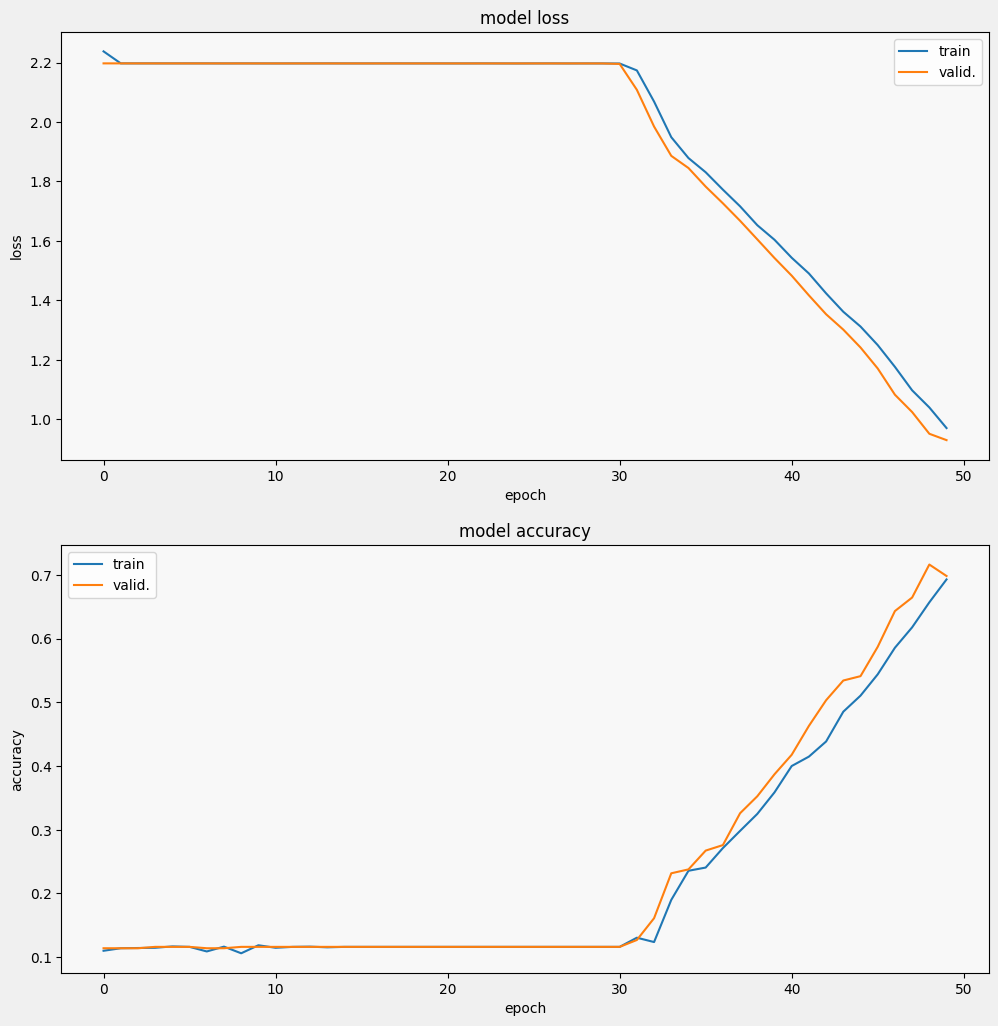

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Display the training curves
display_training_curves(
    best_history.history['loss'],
    best_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    best_history.history['accuracy'],
    best_history.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
X_val.shape

(696, 1000, 1)

22/22 [==============================] - 0s 3ms/step


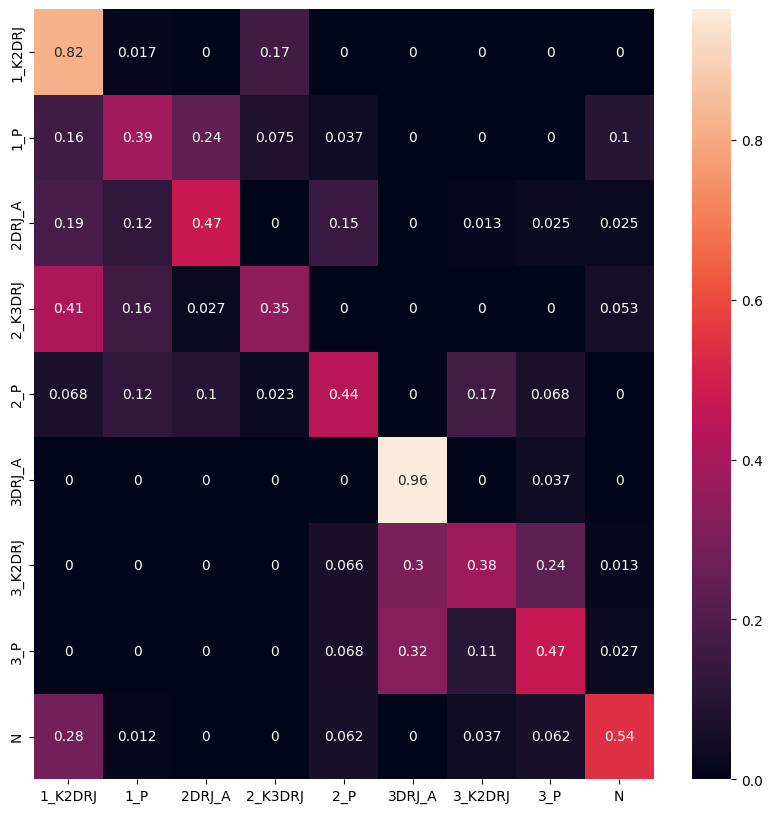

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

# Perform predictions on the validation data
y_pred = cnn_model.predict(X_val)

# Inverse transform the results to obtain class labels
Y_pred = y_pred.argmax(axis=1)
Y_val = y_val.argmax(axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_val, Y_pred, normalize='true')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data validasi
y_pred = cnn_model.predict(X_val)

# Menampilkan classification report
print(classification_report(Y_val, Y_pred))

22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.36      0.82      0.50        60
           1       0.47      0.39      0.42        80
           2       0.56      0.47      0.51        80
           3       0.59      0.35      0.44        75
           4       0.57      0.44      0.50        88
           5       0.63      0.96      0.76        82
           6       0.52      0.38      0.44        76
           7       0.51      0.47      0.49        74
           8       0.72      0.54      0.62        81

    accuracy                           0.53       696
   macro avg       0.55      0.54      0.52       696
weighted avg       0.55      0.53      0.52       696



In [ ]:
from tensorflow.keras import Model
dummy_ann = Model(inputs=cnn_model.input,outputs=cnn_model.layers[-2].output)
y_viz = dummy_ann.predict(X_train)

87/87 [==============================] - 0s 3ms/step


In [ ]:
y_viz.shape

(2780, 130)

In [ ]:
def T_SNE_plot(X_train,y_train,model,encoder):

    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train)

    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

22/22 [==============================] - 0s 2ms/step
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 696 samples in 0.001s...
[t-SNE] Computed neighbors for 696 samples in 0.149s...
[t-SNE] Computed conditional probabilities for sample 696 / 696
[t-SNE] Mean sigma: 0.056523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.992233
[t-SNE] KL divergence after 300 iterations: 0.542063


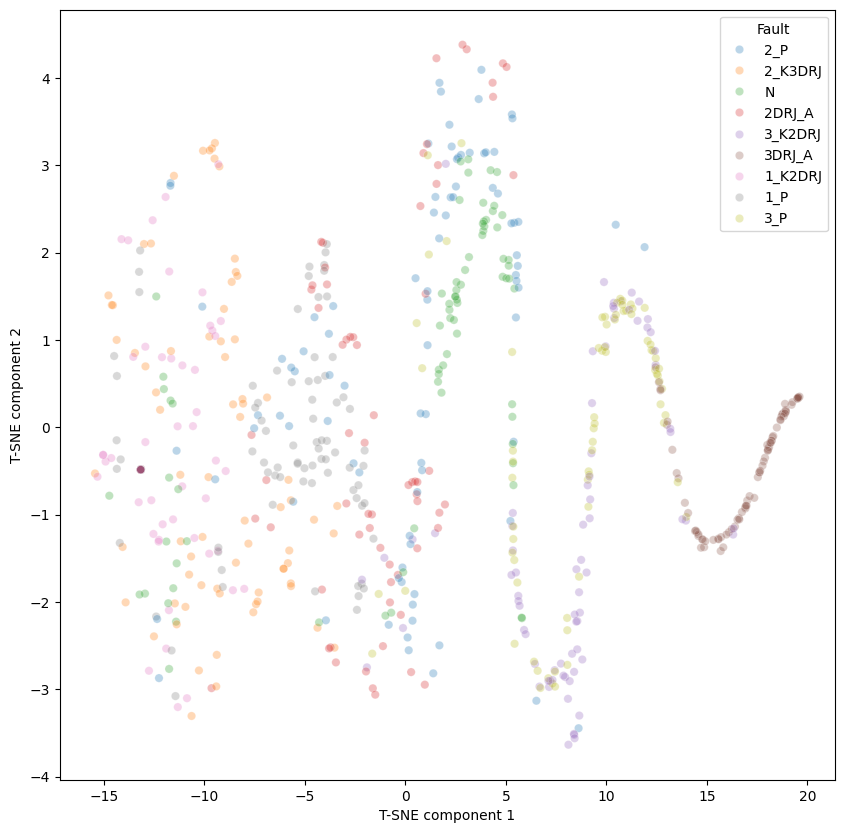

Model telah disimpan sebagai 'model_cnn.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
T_SNE_plot(X_val,y_val,cnn_model,encoder)

cnn_model.save('/content/drive/MyDrive/Skripsi_naufal/WIN1000_1DCNN3.h5')
print("Model telah disimpan sebagai 'model_cnn.h5'")

# Klasifikasi menggunakan 1D CNN 100 epoch



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Skripsi_naufal/data_train.csv')
df

,data,fault
0,-0.08,1_P
1,-0.15,1_P
2,-0.15,1_P
3,-0.15,1_P
4,0.00,1_P
...,...,...
182572,-0.38,N
182573,-0.11,N
182574,-0.11,N
182575,-0.11,N


In [ ]:
# Count the occurrences of each class in the 'fault' column
class_counts = df['fault'].value_counts()

# Print the counts
print(class_counts)

2_K3DRJ    20593
2DRJ_A     20411
3DRJ_A     20398
1_P        20314
3_K2DRJ    20217
2_P        20216
N          20192
3_P        20131
1_K2DRJ    20105
Name: fault, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182577 entries, 0 to 182576
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    182577 non-null  float64
 1   fault   182577 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


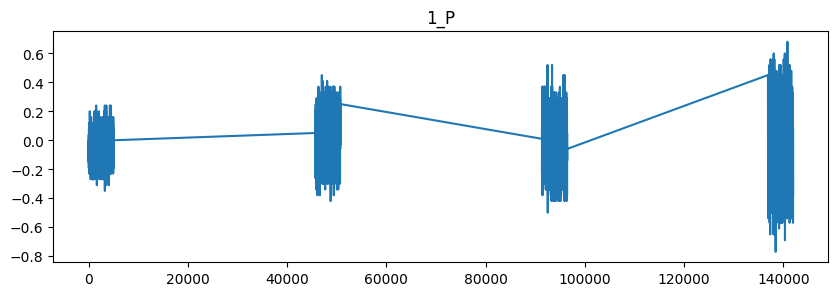

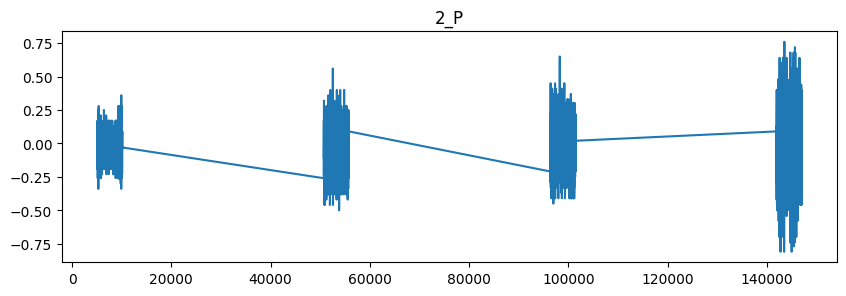

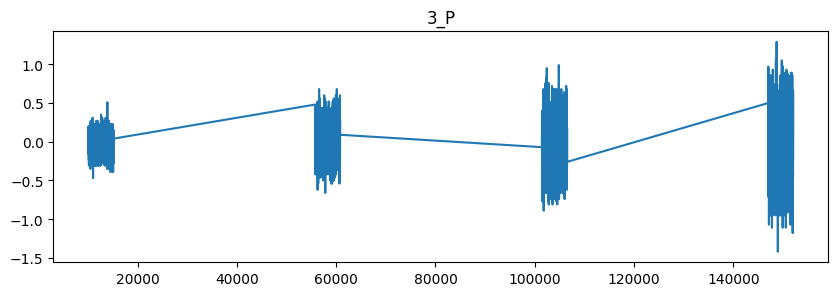

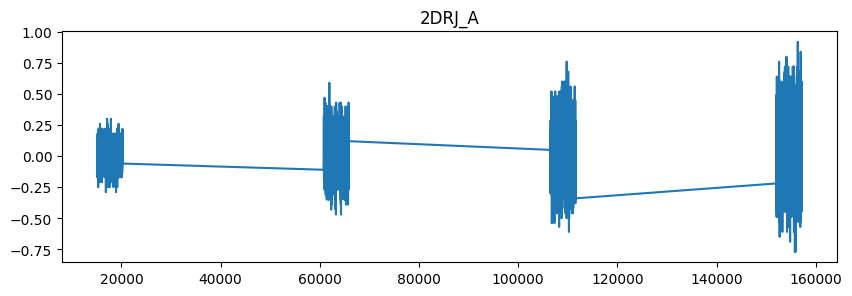

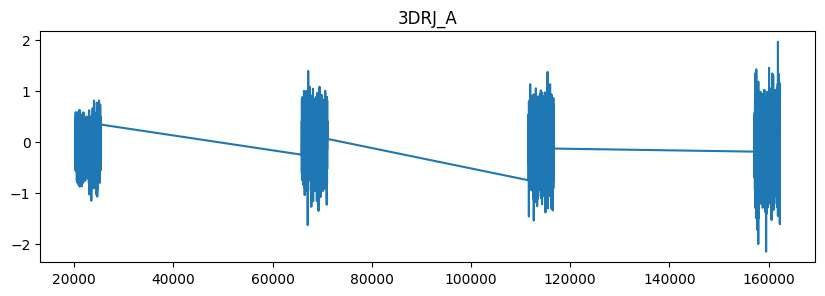

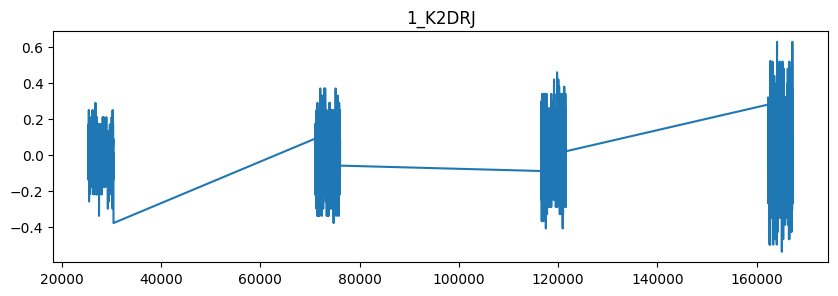

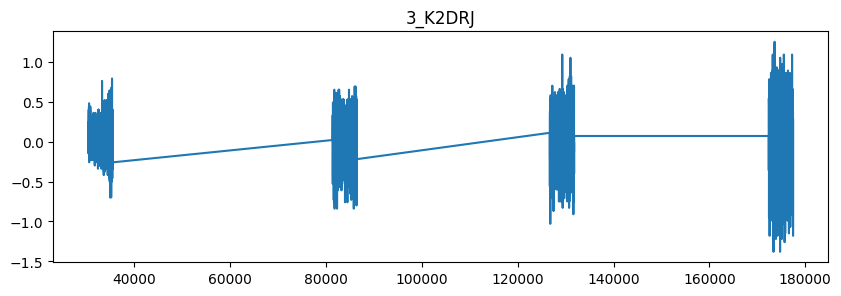

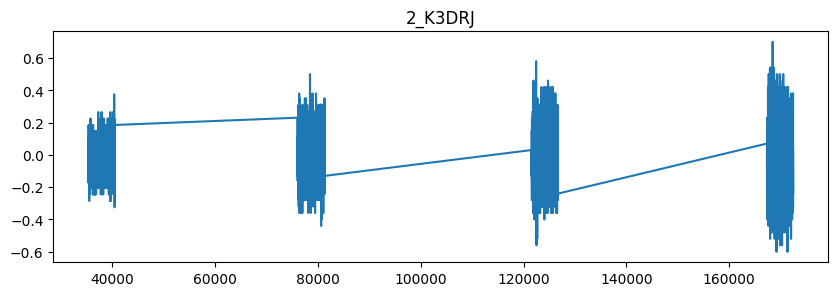

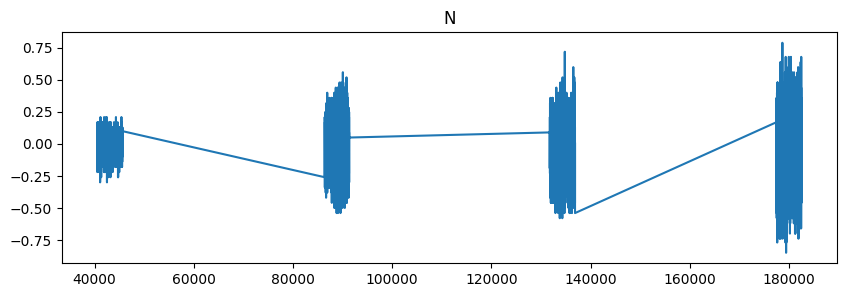

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [ ]:
faults = df['data'].unique()

# menampilkan nilai unik pada kolom 'fault'
print(faults)

[-0.08  -0.15   0.    -0.04   0.04  -0.19   0.08   0.12  -0.11  -0.23
  0.2    0.16  -0.27   0.24  -0.31  -0.35   0.01   0.09  -0.03  -0.07
  0.13   0.17   0.05  -0.26  -0.11   0.25  -0.34   0.28   0.21  -0.3
  0.36   0.2   -0.16  -0.12   0.16   0.12  -0.24  -0.28  -0.2    0.23
  0.27   0.31  -0.47   0.35   0.51  -0.39  -0.1    0.06  -0.02  -0.17
 -0.06   0.02   0.1    0.14   0.18  -0.14  -0.25   0.22  -0.21   0.26
 -0.29   0.3   -0.05   0.46  -0.09   0.07  -0.13   0.03  -0.33  -0.56
  0.58  -0.01   0.34   0.15   0.38  -0.36   0.11  -0.44  -0.4   -0.76
 -0.52  -0.8   -0.6   -0.64  -0.72  -0.84   0.62  -0.48  -0.87  -0.68
  0.42   0.5    0.54  -1.03  -1.15   0.66  -0.91   0.81   0.77  -0.95
 -1.07   0.73   0.01  -0.03  -0.14  -0.07   0.13   0.05  -0.1   -0.26
 -0.22   0.09  -0.18   0.29  -0.34  -0.3   -0.38   0.4    0.44   0.48
  0.32   0.76  -0.42  -0.38   0.52   0.6    0.64  -0.46  -0.5   -0.7
  0.56   0.68   0.79  -0.055 -0.175 -0.015  0.105 -0.095  0.185  0.065
  0.025 -0.135  0.145

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=50

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))

encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)


In [ ]:
print(encoded_Y)
print(Y)

[1 1 1 ... 8 8 8]
['1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '

In [ ]:
X.shape

(3476, 1000, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [ ]:
X_train.shape

(2780, 1000, 1)

In [ ]:
X_val.shape

(696, 1000, 1)

In [ ]:
y_train.shape

(2780, 9)

In [ ]:
y_val.shape

(696, 9)

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the number of classes
no_classes = len(df['fault'].unique())

# Define the search space
pbounds = {'filters': (16, 128),
           'kernel_size': (10, 100),
           'dense_units': (10, 200),
           'dropout_rate': (0.1, 0.5)}

# Define the objective function
def cnn_objective(filters, kernel_size, dense_units, dropout_rate):
    # Create the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=int(filters), kernel_size=int(kernel_size), activation='relu', input_shape=(X.shape[1], X.shape[2])))
    cnn_model.add(Conv1D(filters=int(filters/2), kernel_size=int(kernel_size/2), activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=4))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(int(dense_units), activation='relu'))
    cnn_model.add(Dropout(dropout_rate))
    cnn_model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=300, validation_data=(X_train, y_train), callbacks=[EarlyStopping(patience=3)])

    # Evaluate the model
    loss, accuracy = cnn_model.evaluate(X_val, y_val)


    return accuracy

# Create the Bayesian optimizer
optimizer = BayesianOptimization(f=cnn_objective, pbounds=pbounds, random_state=1)

# Run the optimization
optimizer.maximize(n_iter=3)

# Get the best hyperparameters and iteration
best_params = optimizer.max['params']
best_iteration = optimizer.max['target']

print('Best hyperparameters:', best_params)
print('Best iteration:', best_iteration)


|   iter    |  target   | dense_... | dropou... |  filters  | kernel... |
-------------------------------------------------------------------------
Epoch 1/50
10/10 [==============================] - 2s 46ms/step - loss: 2.1594 - accuracy: 0.1025 - val_loss: 2.1085 - val_accuracy: 0.1076
Epoch 2/50
10/10 [==============================] - 0s 20ms/step - loss: 2.0927 - accuracy: 0.1299 - val_loss: 2.0298 - val_accuracy: 0.1324
Epoch 3/50
10/10 [==============================] - 0s 20ms/step - loss: 1.9974 - accuracy: 0.1763 - val_loss: 1.8869 - val_accuracy: 0.2493
Epoch 4/50
10/10 [==============================] - 0s 19ms/step - loss: 1.8403 - accuracy: 0.2914 - val_loss: 1.6757 - val_accuracy: 0.4306
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 1.6508 - accuracy: 0.3950 - val_loss: 1.4709 - val_accuracy: 0.4705
Epoch 6/50
10/10 [==============================] - 0s 18ms/step - loss: 1.4802 - accuracy: 0.4453 - val_loss: 1.2717 - val_accuracy: 0.5388
Epoch 

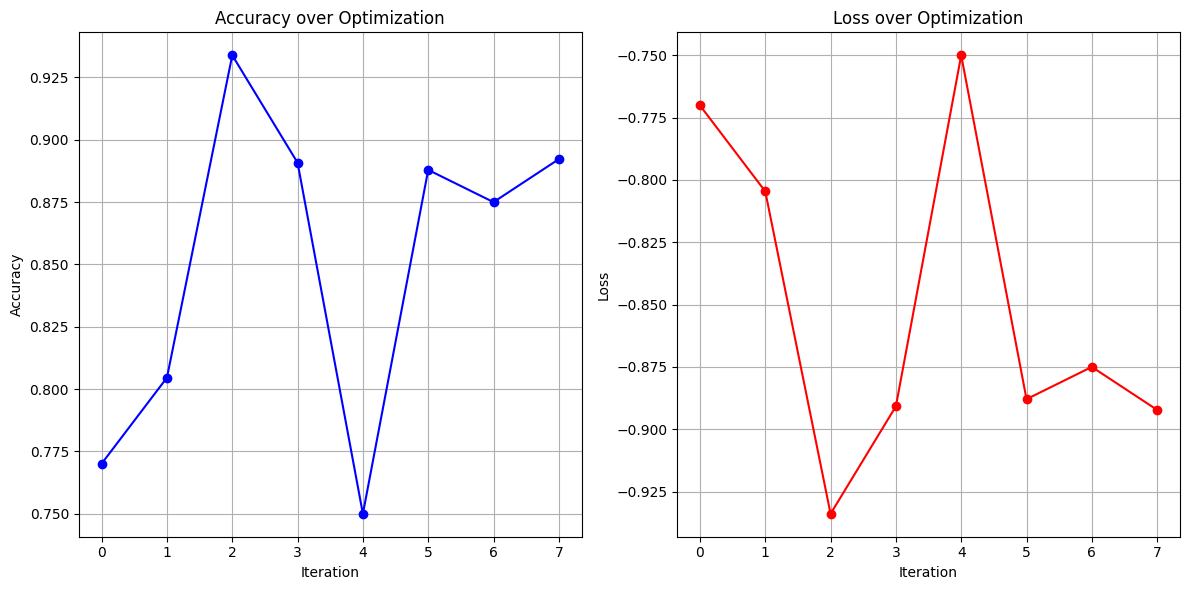

In [ ]:
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss selama optimisasi
iterations = []
accuracies = []
losses = []

for i, res in enumerate(optimizer.res):
    iterations.append(i)
    accuracies.append(res['target'])
    # BayesOpt tidak meminimalkan loss, maka diambil nilai negatif
    losses.append(-res['target'])

# Membuat plot akurasi
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

# Membuat plot loss
plt.subplot(122)
plt.plot(iterations, losses, marker='o', linestyle='-', color='r')
plt.title('Loss over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Train the model using the best hyperparameters
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=int(best_params['filters']), kernel_size=int(best_params['kernel_size']), activation='relu', input_shape=(X.shape[1], X.shape[2])))
cnn_model.add(Conv1D(filters=int(best_params['filters']/2), kernel_size=int(best_params['kernel_size']/2), activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(int(best_params['dense_units']), activation='relu'))
cnn_model.add(Dropout(best_params['dropout_rate']))
cnn_model.add(Dense(no_classes, activation='softmax'))

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#, callbacks=[early_stop]

# Train the model
best_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=300, validation_data=(X_train, y_train))


Epoch 1/100
10/10 [==============================] - 2s 74ms/step - loss: 2.1669 - accuracy: 0.1137 - val_loss: 2.0996 - val_accuracy: 0.1119
Epoch 2/100
10/10 [==============================] - 0s 46ms/step - loss: 2.0367 - accuracy: 0.1612 - val_loss: 1.8940 - val_accuracy: 0.2097
Epoch 3/100
10/10 [==============================] - 0s 46ms/step - loss: 1.8121 - accuracy: 0.2784 - val_loss: 1.6052 - val_accuracy: 0.4014
Epoch 4/100
10/10 [==============================] - 0s 51ms/step - loss: 1.5914 - accuracy: 0.3658 - val_loss: 1.4003 - val_accuracy: 0.4662
Epoch 5/100
10/10 [==============================] - 0s 51ms/step - loss: 1.4110 - accuracy: 0.4583 - val_loss: 1.1990 - val_accuracy: 0.5716
Epoch 6/100
10/10 [==============================] - 0s 45ms/step - loss: 1.2433 - accuracy: 0.5360 - val_loss: 1.0264 - val_accuracy: 0.6403
Epoch 7/100
10/10 [==============================] - 0s 51ms/step - loss: 1.0684 - accuracy: 0.5964 - val_loss: 0.9058 - val_accuracy: 0.6547
Epoch 

<ipython-input-80-350f4d42c117>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


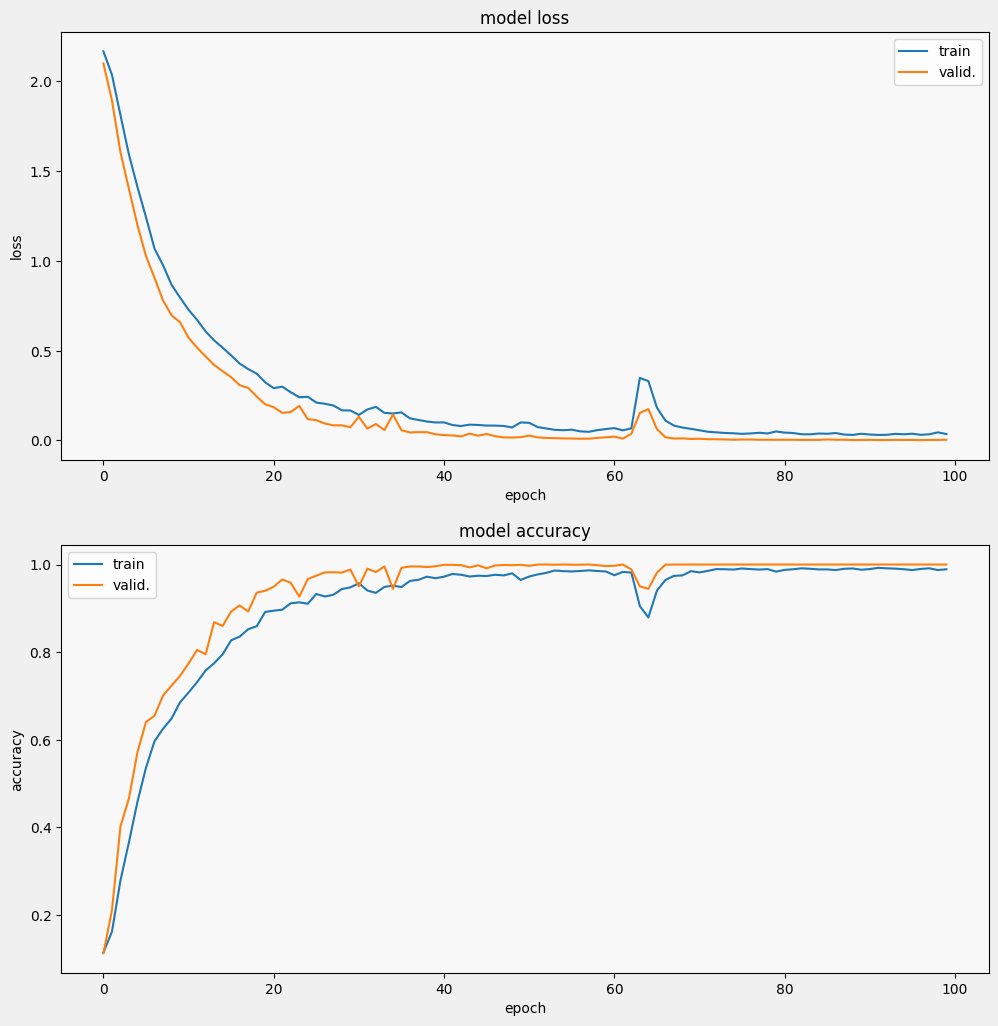

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Display the training curves
display_training_curves(
    best_history.history['loss'],
    best_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    best_history.history['accuracy'],
    best_history.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
X_val.shape

(696, 1000, 1)

22/22 [==============================] - 0s 3ms/step


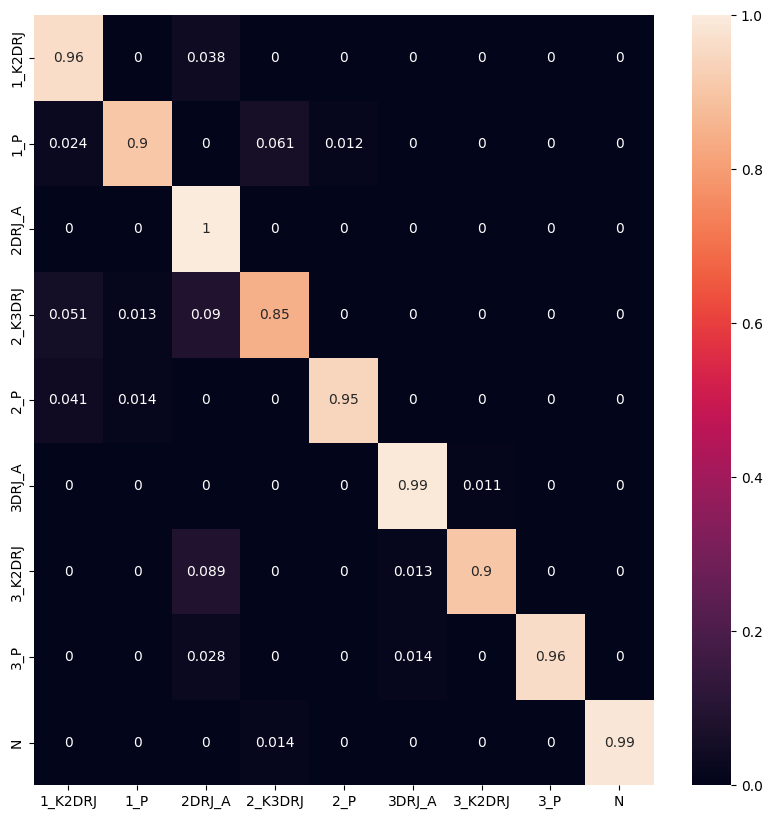

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

# Perform predictions on the validation data
y_pred = cnn_model.predict(X_val)

# Inverse transform the results to obtain class labels
Y_pred = y_pred.argmax(axis=1)
Y_val = y_val.argmax(axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_val, Y_pred, normalize='true')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data validasi
y_pred = cnn_model.predict(X_val)

# Menampilkan classification report
print(classification_report(Y_val, Y_pred))

22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        78
           1       0.97      0.90      0.94        82
           2       0.79      1.00      0.88        72
           3       0.92      0.85      0.88        78
           4       0.99      0.95      0.97        73
           5       0.98      0.99      0.98        89
           6       0.99      0.90      0.94        79
           7       1.00      0.96      0.98        72
           8       1.00      0.99      0.99        73

    accuracy                           0.94       696
   macro avg       0.95      0.94      0.94       696
weighted avg       0.95      0.94      0.94       696



In [ ]:
from tensorflow.keras import Model
dummy_ann = Model(inputs=cnn_model.input,outputs=cnn_model.layers[-2].output)
y_viz = dummy_ann.predict(X_train)

87/87 [==============================] - 0s 3ms/step


In [ ]:
y_viz.shape

(2780, 85)

In [ ]:
def T_SNE_plot(X_train,y_train,model,encoder):

    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train)

    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

22/22 [==============================] - 0s 2ms/step
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 696 samples in 0.001s...
[t-SNE] Computed neighbors for 696 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 696 / 696
[t-SNE] Mean sigma: 8.953923
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.887489
[t-SNE] KL divergence after 300 iterations: 0.416288


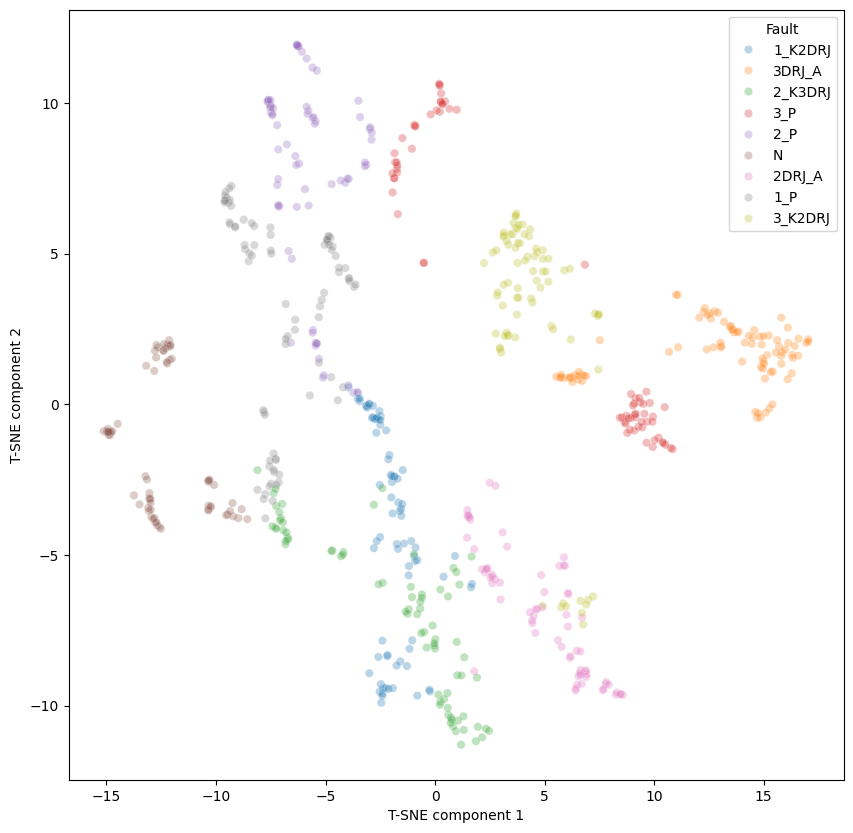

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model telah disimpan sebagai 'model_cnn.h5'


In [ ]:
T_SNE_plot(X_val,y_val,cnn_model,encoder)

cnn_model.save('/content/drive/MyDrive/Skripsi_naufal/WIN1000_1DCNN_100ep.h5')
print("Model telah disimpan sebagai 'model_cnn.h5'")

# Klasifikasi menggunakan 1D CNN 150 epoch



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Skripsi_naufal/data_train.csv')
df

,data,fault
0,-0.08,1_P
1,-0.15,1_P
2,-0.15,1_P
3,-0.15,1_P
4,0.00,1_P
...,...,...
182572,-0.38,N
182573,-0.11,N
182574,-0.11,N
182575,-0.11,N


In [ ]:
# Count the occurrences of each class in the 'fault' column
class_counts = df['fault'].value_counts()

# Print the counts
print(class_counts)

2_K3DRJ    20593
2DRJ_A     20411
3DRJ_A     20398
1_P        20314
3_K2DRJ    20217
2_P        20216
N          20192
3_P        20131
1_K2DRJ    20105
Name: fault, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182577 entries, 0 to 182576
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    182577 non-null  float64
 1   fault   182577 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


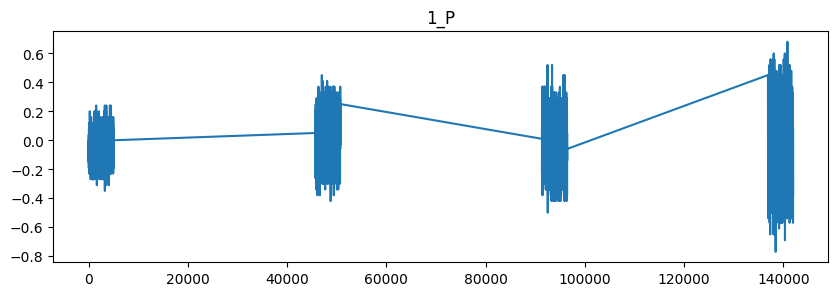

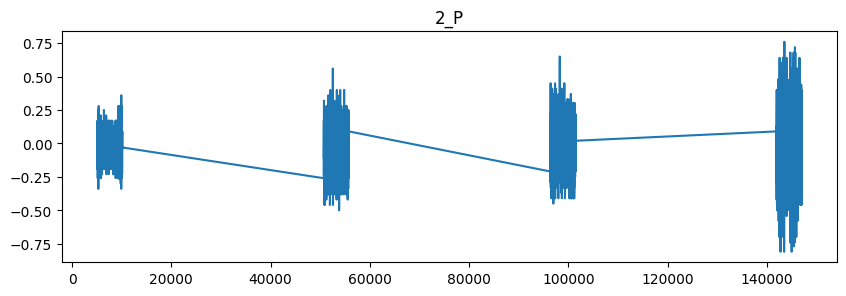

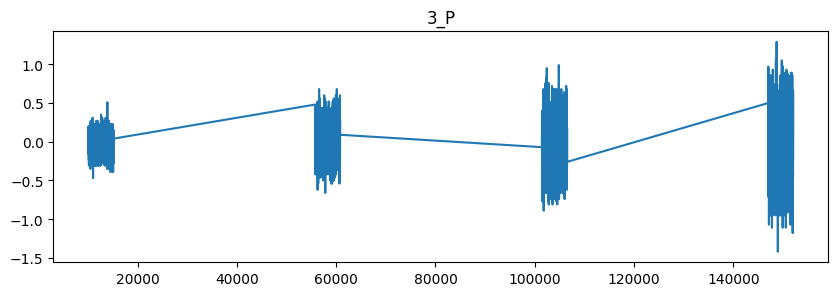

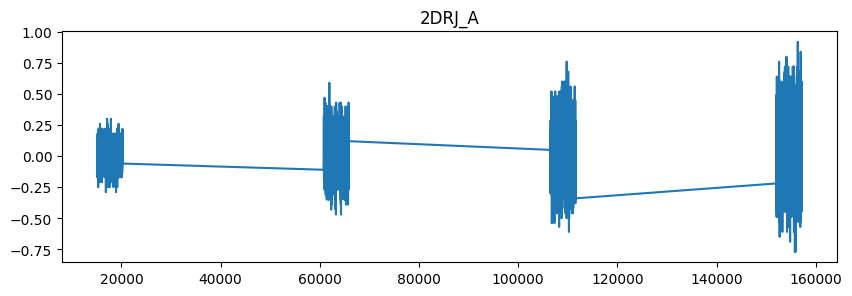

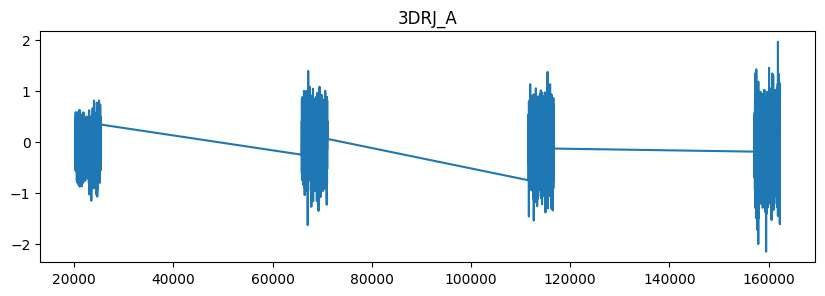

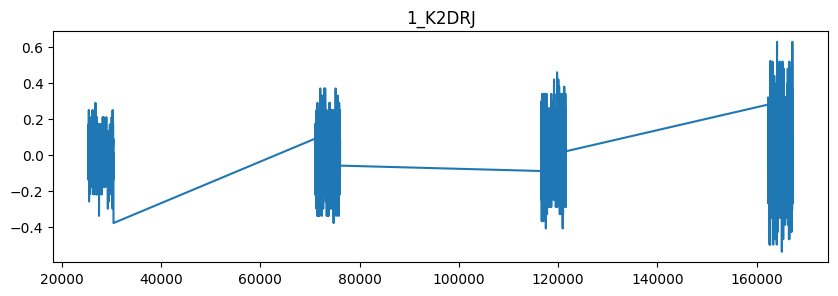

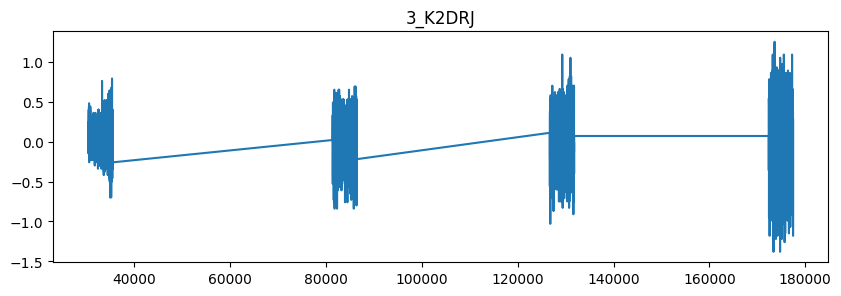

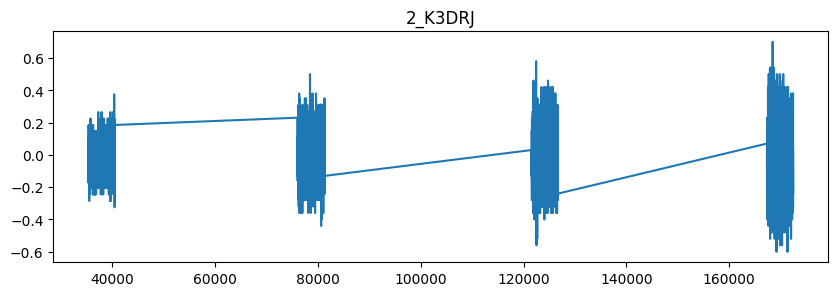

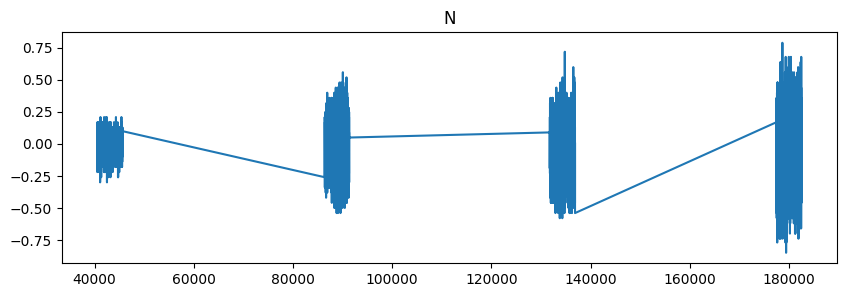

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [ ]:
faults = df['data'].unique()

# menampilkan nilai unik pada kolom 'fault'
print(faults)

[-0.08  -0.15   0.    -0.04   0.04  -0.19   0.08   0.12  -0.11  -0.23
  0.2    0.16  -0.27   0.24  -0.31  -0.35   0.01   0.09  -0.03  -0.07
  0.13   0.17   0.05  -0.26  -0.11   0.25  -0.34   0.28   0.21  -0.3
  0.36   0.2   -0.16  -0.12   0.16   0.12  -0.24  -0.28  -0.2    0.23
  0.27   0.31  -0.47   0.35   0.51  -0.39  -0.1    0.06  -0.02  -0.17
 -0.06   0.02   0.1    0.14   0.18  -0.14  -0.25   0.22  -0.21   0.26
 -0.29   0.3   -0.05   0.46  -0.09   0.07  -0.13   0.03  -0.33  -0.56
  0.58  -0.01   0.34   0.15   0.38  -0.36   0.11  -0.44  -0.4   -0.76
 -0.52  -0.8   -0.6   -0.64  -0.72  -0.84   0.62  -0.48  -0.87  -0.68
  0.42   0.5    0.54  -1.03  -1.15   0.66  -0.91   0.81   0.77  -0.95
 -1.07   0.73   0.01  -0.03  -0.14  -0.07   0.13   0.05  -0.1   -0.26
 -0.22   0.09  -0.18   0.29  -0.34  -0.3   -0.38   0.4    0.44   0.48
  0.32   0.76  -0.42  -0.38   0.52   0.6    0.64  -0.46  -0.5   -0.7
  0.56   0.68   0.79  -0.055 -0.175 -0.015  0.105 -0.095  0.185  0.065
  0.025 -0.135  0.145

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=50

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))

encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)


In [ ]:
print(encoded_Y)
print(Y)

[1 1 1 ... 8 8 8]
['1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '

In [ ]:
X.shape

(3476, 1000, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [ ]:
X_train.shape

(2780, 1000, 1)

In [ ]:
X_val.shape

(696, 1000, 1)

In [ ]:
y_train.shape

(2780, 9)

In [ ]:
y_val.shape

(696, 9)

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the number of classes
no_classes = len(df['fault'].unique())

# Define the search space
pbounds = {'filters': (16, 128),
           'kernel_size': (10, 100),
           'dense_units': (10, 200),
           'dropout_rate': (0.1, 0.5)}

# Define the objective function
def cnn_objective(filters, kernel_size, dense_units, dropout_rate):
    # Create the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=int(filters), kernel_size=int(kernel_size), activation='relu', input_shape=(X.shape[1], X.shape[2])))
    cnn_model.add(Conv1D(filters=int(filters/2), kernel_size=int(kernel_size/2), activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=4))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(int(dense_units), activation='relu'))
    cnn_model.add(Dropout(dropout_rate))
    cnn_model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=300, validation_data=(X_train, y_train), callbacks=[EarlyStopping(patience=3)])

    # Evaluate the model
    loss, accuracy = cnn_model.evaluate(X_val, y_val)


    return accuracy

# Create the Bayesian optimizer
optimizer = BayesianOptimization(f=cnn_objective, pbounds=pbounds, random_state=1)

# Run the optimization
optimizer.maximize(n_iter=3)

# Get the best hyperparameters and iteration
best_params = optimizer.max['params']
best_iteration = optimizer.max['target']

print('Best hyperparameters:', best_params)
print('Best iteration:', best_iteration)


|   iter    |  target   | dense_... | dropou... |  filters  | kernel... |
-------------------------------------------------------------------------
Epoch 1/50
10/10 [==============================] - 2s 124ms/step - loss: 2.1576 - accuracy: 0.1176 - val_loss: 2.1087 - val_accuracy: 0.1165
Epoch 2/50
10/10 [==============================] - 1s 54ms/step - loss: 2.0836 - accuracy: 0.1288 - val_loss: 2.0089 - val_accuracy: 0.1191
Epoch 3/50
10/10 [==============================] - 0s 40ms/step - loss: 1.9800 - accuracy: 0.1809 - val_loss: 1.8838 - val_accuracy: 0.2637
Epoch 4/50
10/10 [==============================] - 0s 43ms/step - loss: 1.8715 - accuracy: 0.2619 - val_loss: 1.7538 - val_accuracy: 0.3507
Epoch 5/50
10/10 [==============================] - 0s 53ms/step - loss: 1.7663 - accuracy: 0.3237 - val_loss: 1.6599 - val_accuracy: 0.3932
Epoch 6/50
10/10 [==============================] - 1s 56ms/step - loss: 1.6769 - accuracy: 0.3468 - val_loss: 1.5640 - val_accuracy: 0.4011
Epoch

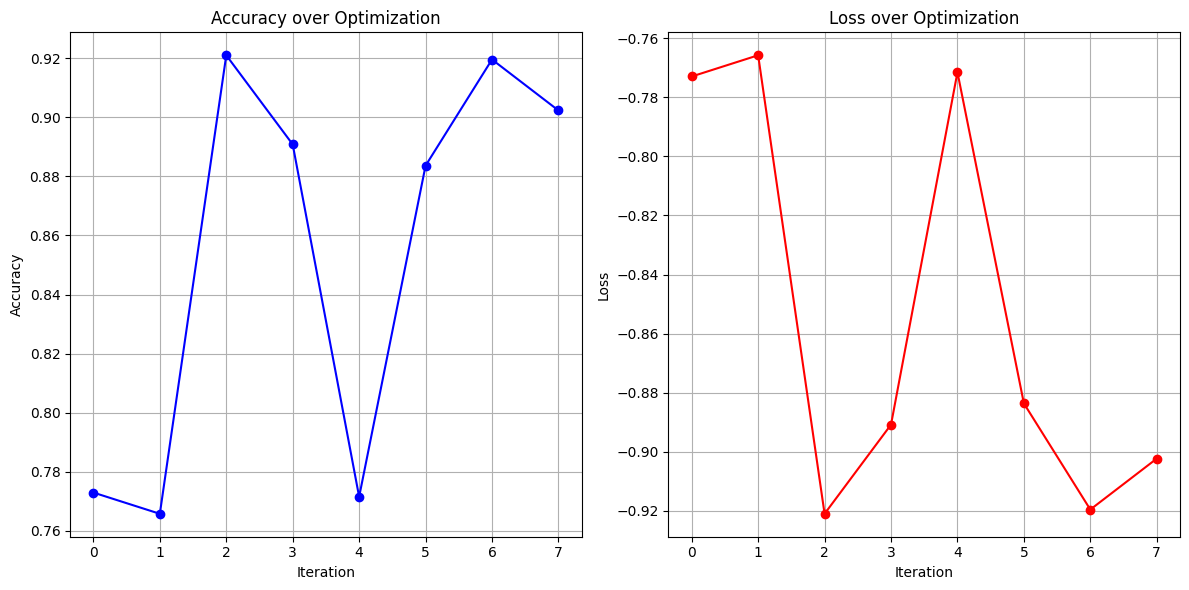

In [ ]:
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss selama optimisasi
iterations = []
accuracies = []
losses = []

for i, res in enumerate(optimizer.res):
    iterations.append(i)
    accuracies.append(res['target'])
    # BayesOpt tidak meminimalkan loss, maka diambil nilai negatif
    losses.append(-res['target'])

# Membuat plot akurasi
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

# Membuat plot loss
plt.subplot(122)
plt.plot(iterations, losses, marker='o', linestyle='-', color='r')
plt.title('Loss over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Train the model using the best hyperparameters
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=int(best_params['filters']), kernel_size=int(best_params['kernel_size']), activation='relu', input_shape=(X.shape[1], X.shape[2])))
cnn_model.add(Conv1D(filters=int(best_params['filters']/2), kernel_size=int(best_params['kernel_size']/2), activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(int(best_params['dense_units']), activation='relu'))
cnn_model.add(Dropout(best_params['dropout_rate']))
cnn_model.add(Dense(no_classes, activation='softmax'))

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#, callbacks=[early_stop]

# Train the model
best_history = cnn_model.fit(X_train, y_train, epochs=150, batch_size=300, validation_data=(X_train, y_train))


Epoch 1/150
10/10 [==============================] - 2s 89ms/step - loss: 2.1602 - accuracy: 0.1155 - val_loss: 2.0738 - val_accuracy: 0.1165
Epoch 2/150
10/10 [==============================] - 1s 52ms/step - loss: 1.9982 - accuracy: 0.1799 - val_loss: 1.8254 - val_accuracy: 0.2353
Epoch 3/150
10/10 [==============================] - 0s 46ms/step - loss: 1.7738 - accuracy: 0.2619 - val_loss: 1.6276 - val_accuracy: 0.3655
Epoch 4/150
10/10 [==============================] - 0s 50ms/step - loss: 1.5974 - accuracy: 0.3723 - val_loss: 1.4128 - val_accuracy: 0.4309
Epoch 5/150
10/10 [==============================] - 0s 45ms/step - loss: 1.3995 - accuracy: 0.4612 - val_loss: 1.1566 - val_accuracy: 0.6029
Epoch 6/150
10/10 [==============================] - 0s 50ms/step - loss: 1.1882 - accuracy: 0.5608 - val_loss: 0.9347 - val_accuracy: 0.7011
Epoch 7/150
10/10 [==============================] - 0s 50ms/step - loss: 1.0605 - accuracy: 0.5978 - val_loss: 0.8366 - val_accuracy: 0.7047
Epoch 

<ipython-input-40-350f4d42c117>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


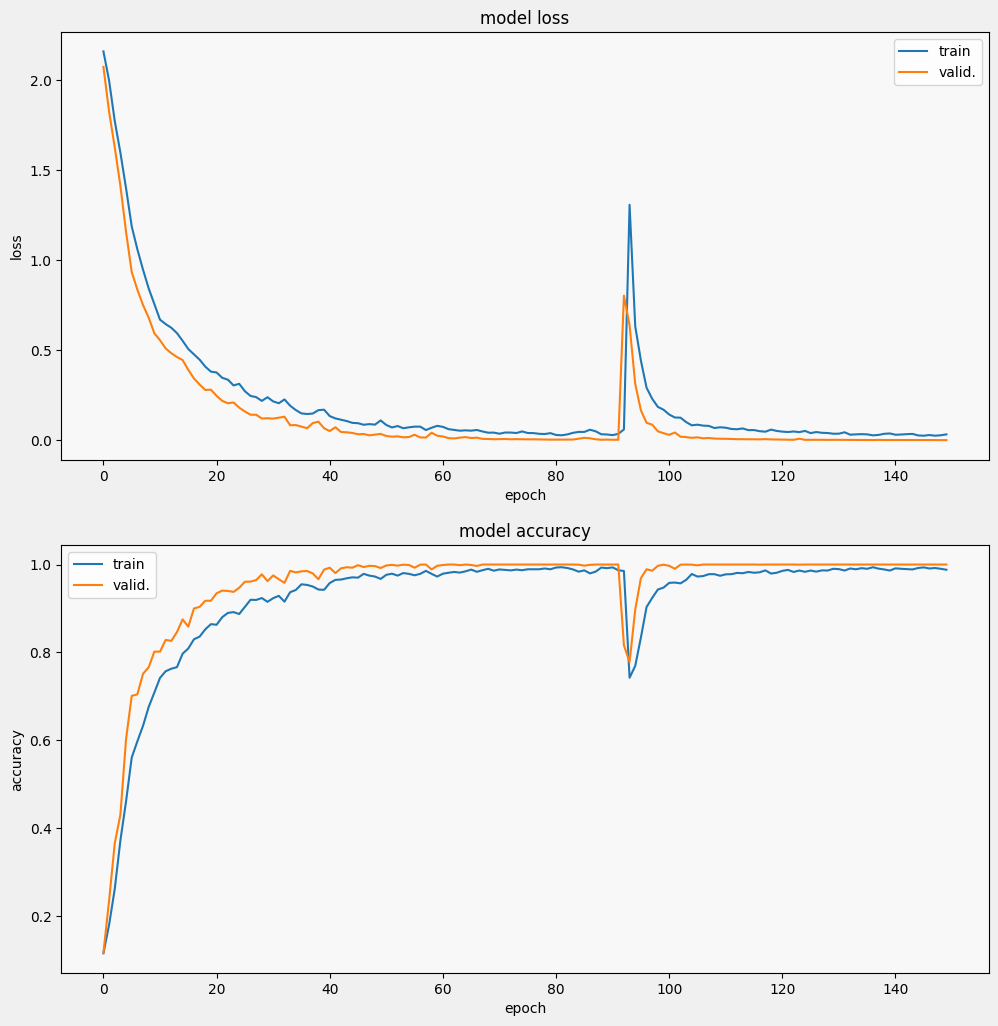

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Display the training curves
display_training_curves(
    best_history.history['loss'],
    best_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    best_history.history['accuracy'],
    best_history.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
X_val.shape

(696, 1000, 1)

22/22 [==============================] - 0s 4ms/step


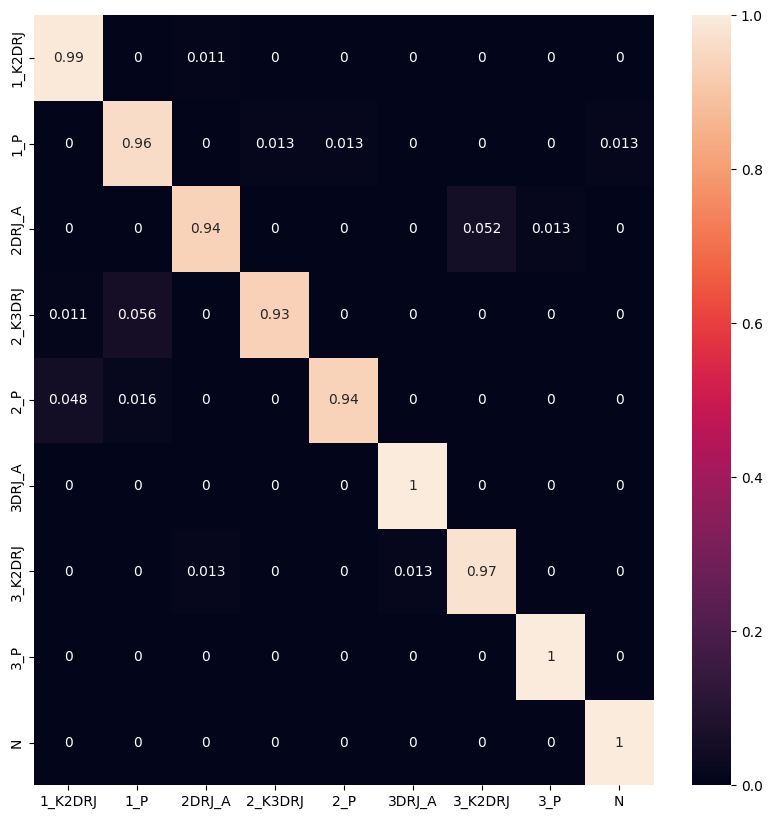

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

# Perform predictions on the validation data
y_pred = cnn_model.predict(X_val)

# Inverse transform the results to obtain class labels
Y_pred = y_pred.argmax(axis=1)
Y_val = y_val.argmax(axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_val, Y_pred, normalize='true')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data validasi
y_pred = cnn_model.predict(X_val)

# Menampilkan classification report
print(classification_report(Y_val, Y_pred))

22/22 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.92      0.96      0.94        76
           2       0.97      0.94      0.95        77
           3       0.99      0.93      0.96        90
           4       0.98      0.94      0.96        63
           5       0.98      1.00      0.99        64
           6       0.95      0.97      0.96        76
           7       0.99      1.00      0.99        81
           8       0.99      1.00      0.99        81

    accuracy                           0.97       696
   macro avg       0.97      0.97      0.97       696
weighted avg       0.97      0.97      0.97       696



In [ ]:
from tensorflow.keras import Model
dummy_ann = Model(inputs=cnn_model.input,outputs=cnn_model.layers[-2].output)
y_viz = dummy_ann.predict(X_train)

87/87 [==============================] - 1s 4ms/step


In [ ]:
y_viz.shape

(2780, 85)

In [ ]:
def T_SNE_plot(X_train,y_train,model,encoder):

    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train)

    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

22/22 [==============================] - 0s 3ms/step
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 696 samples in 0.001s...
[t-SNE] Computed neighbors for 696 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 696 / 696
[t-SNE] Mean sigma: 9.627940
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.166061
[t-SNE] KL divergence after 300 iterations: 0.417491


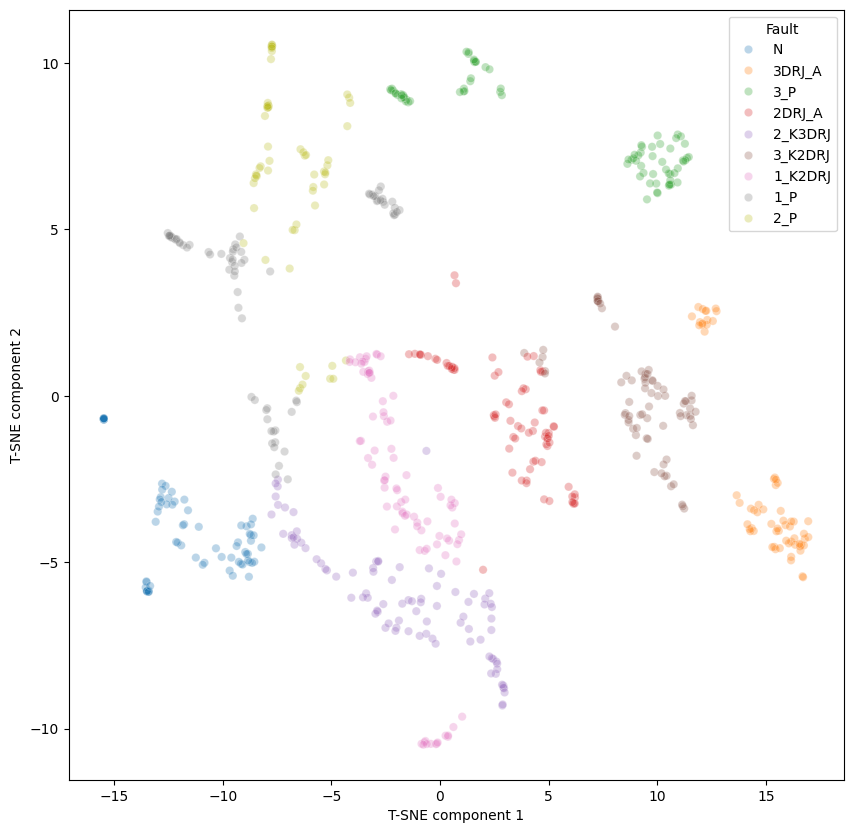

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model telah disimpan sebagai 'model_cnn.h5'


In [ ]:
T_SNE_plot(X_val,y_val,cnn_model,encoder)

cnn_model.save('/content/drive/MyDrive/Skripsi_naufal/WIN1000_1DCNN_150ep.h5')
print("Model telah disimpan sebagai 'model_cnn.h5'")

# Klasifikasi menggunakan 1D CNN 200 epoch



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Skripsi_naufal/data_train.csv')
df

,data,fault
0,-0.08,1_P
1,-0.15,1_P
2,-0.15,1_P
3,-0.15,1_P
4,0.00,1_P
...,...,...
182572,-0.38,N
182573,-0.11,N
182574,-0.11,N
182575,-0.11,N


In [ ]:
# Count the occurrences of each class in the 'fault' column
class_counts = df['fault'].value_counts()

# Print the counts
print(class_counts)

2_K3DRJ    20593
2DRJ_A     20411
3DRJ_A     20398
1_P        20314
3_K2DRJ    20217
2_P        20216
N          20192
3_P        20131
1_K2DRJ    20105
Name: fault, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182577 entries, 0 to 182576
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    182577 non-null  float64
 1   fault   182577 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


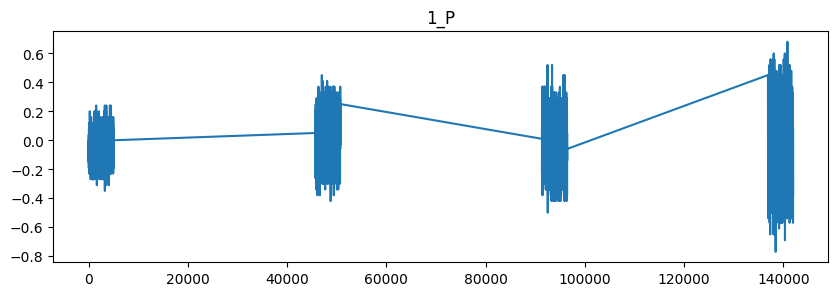

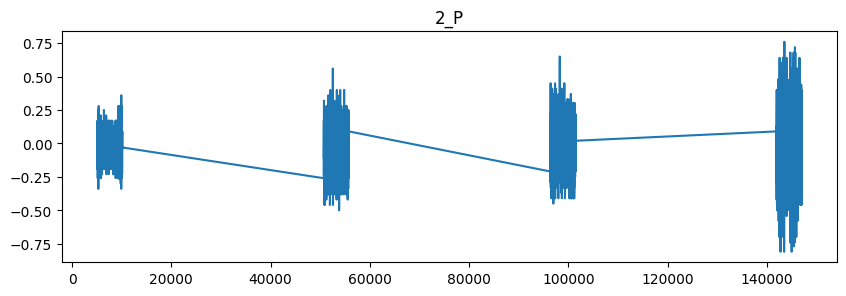

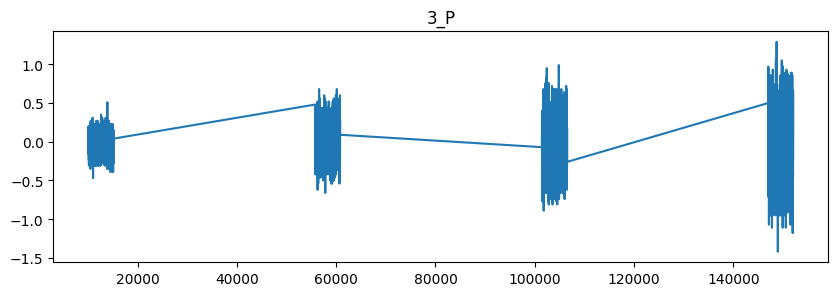

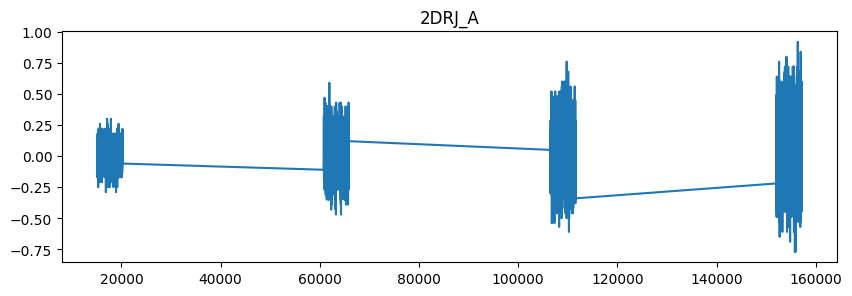

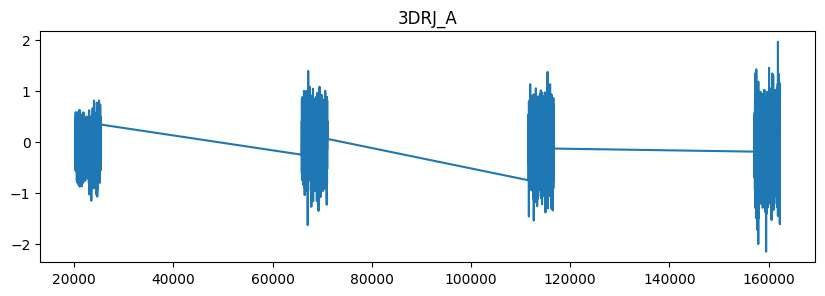

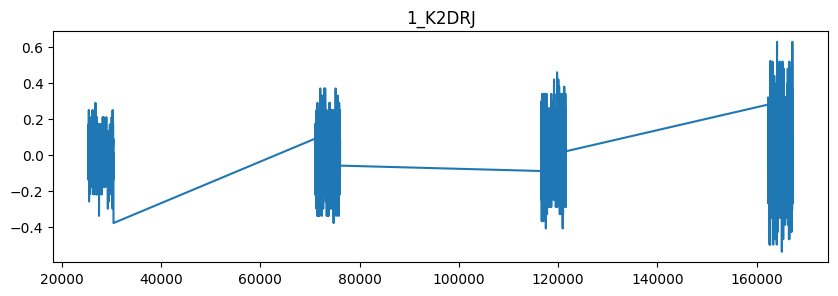

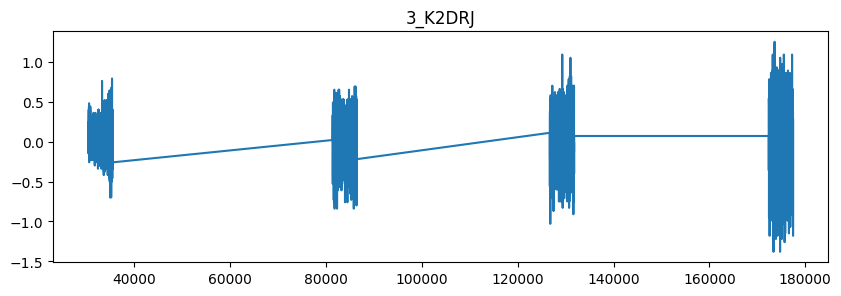

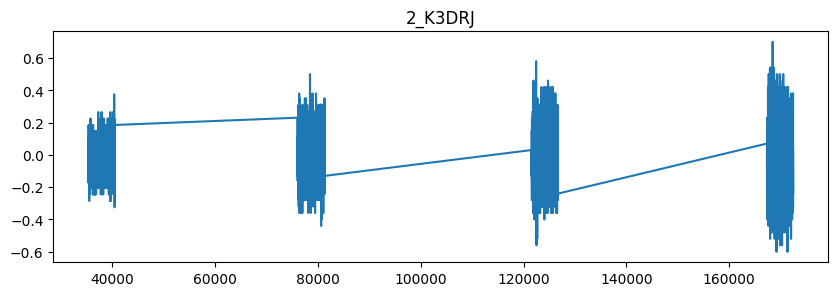

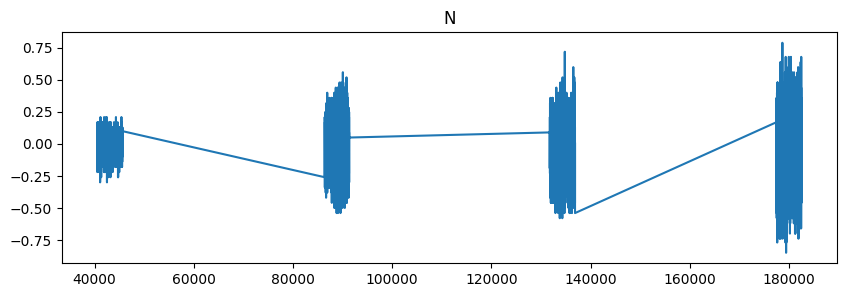

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [ ]:
faults = df['data'].unique()

# menampilkan nilai unik pada kolom 'fault'
print(faults)

[-0.08  -0.15   0.    -0.04   0.04  -0.19   0.08   0.12  -0.11  -0.23
  0.2    0.16  -0.27   0.24  -0.31  -0.35   0.01   0.09  -0.03  -0.07
  0.13   0.17   0.05  -0.26  -0.11   0.25  -0.34   0.28   0.21  -0.3
  0.36   0.2   -0.16  -0.12   0.16   0.12  -0.24  -0.28  -0.2    0.23
  0.27   0.31  -0.47   0.35   0.51  -0.39  -0.1    0.06  -0.02  -0.17
 -0.06   0.02   0.1    0.14   0.18  -0.14  -0.25   0.22  -0.21   0.26
 -0.29   0.3   -0.05   0.46  -0.09   0.07  -0.13   0.03  -0.33  -0.56
  0.58  -0.01   0.34   0.15   0.38  -0.36   0.11  -0.44  -0.4   -0.76
 -0.52  -0.8   -0.6   -0.64  -0.72  -0.84   0.62  -0.48  -0.87  -0.68
  0.42   0.5    0.54  -1.03  -1.15   0.66  -0.91   0.81   0.77  -0.95
 -1.07   0.73   0.01  -0.03  -0.14  -0.07   0.13   0.05  -0.1   -0.26
 -0.22   0.09  -0.18   0.29  -0.34  -0.3   -0.38   0.4    0.44   0.48
  0.32   0.76  -0.42  -0.38   0.52   0.6    0.64  -0.46  -0.5   -0.7
  0.56   0.68   0.79  -0.055 -0.175 -0.015  0.105 -0.095  0.185  0.065
  0.025 -0.135  0.145

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=50

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))

encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)


In [ ]:
print(encoded_Y)
print(Y)

[1 1 1 ... 8 8 8]
['1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '

In [ ]:
X.shape

(3476, 1000, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [ ]:
X_train.shape

(2780, 1000, 1)

In [ ]:
X_val.shape

(696, 1000, 1)

In [ ]:
y_train.shape

(2780, 9)

In [ ]:
y_val.shape

(696, 9)

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the number of classes
no_classes = len(df['fault'].unique())

# Define the search space
pbounds = {'filters': (16, 128),
           'kernel_size': (10, 100),
           'dense_units': (10, 200),
           'dropout_rate': (0.1, 0.5)}

# Define the objective function
def cnn_objective(filters, kernel_size, dense_units, dropout_rate):
    # Create the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=int(filters), kernel_size=int(kernel_size), activation='relu', input_shape=(X.shape[1], X.shape[2])))
    cnn_model.add(Conv1D(filters=int(filters/2), kernel_size=int(kernel_size/2), activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=4))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(int(dense_units), activation='relu'))
    cnn_model.add(Dropout(dropout_rate))
    cnn_model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=300, validation_data=(X_train, y_train), callbacks=[EarlyStopping(patience=3)])

    # Evaluate the model
    loss, accuracy = cnn_model.evaluate(X_val, y_val)


    return accuracy

# Create the Bayesian optimizer
optimizer = BayesianOptimization(f=cnn_objective, pbounds=pbounds, random_state=1)

# Run the optimization
optimizer.maximize(n_iter=3)

# Get the best hyperparameters and iteration
best_params = optimizer.max['params']
best_iteration = optimizer.max['target']

print('Best hyperparameters:', best_params)
print('Best iteration:', best_iteration)


|   iter    |  target   | dense_... | dropou... |  filters  | kernel... |
-------------------------------------------------------------------------
Epoch 1/50
10/10 [==============================] - 2s 53ms/step - loss: 2.1591 - accuracy: 0.1076 - val_loss: 2.0983 - val_accuracy: 0.1104
Epoch 2/50
10/10 [==============================] - 0s 22ms/step - loss: 2.0816 - accuracy: 0.1230 - val_loss: 2.0071 - val_accuracy: 0.1331
Epoch 3/50
10/10 [==============================] - 0s 20ms/step - loss: 1.9770 - accuracy: 0.1777 - val_loss: 1.8714 - val_accuracy: 0.2475
Epoch 4/50
10/10 [==============================] - 0s 17ms/step - loss: 1.8401 - accuracy: 0.2885 - val_loss: 1.6761 - val_accuracy: 0.3615
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 1.6624 - accuracy: 0.3335 - val_loss: 1.4983 - val_accuracy: 0.4173
Epoch 6/50
10/10 [==============================] - 0s 16ms/step - loss: 1.5144 - accuracy: 0.3953 - val_loss: 1.3317 - val_accuracy: 0.4817
Epoch 

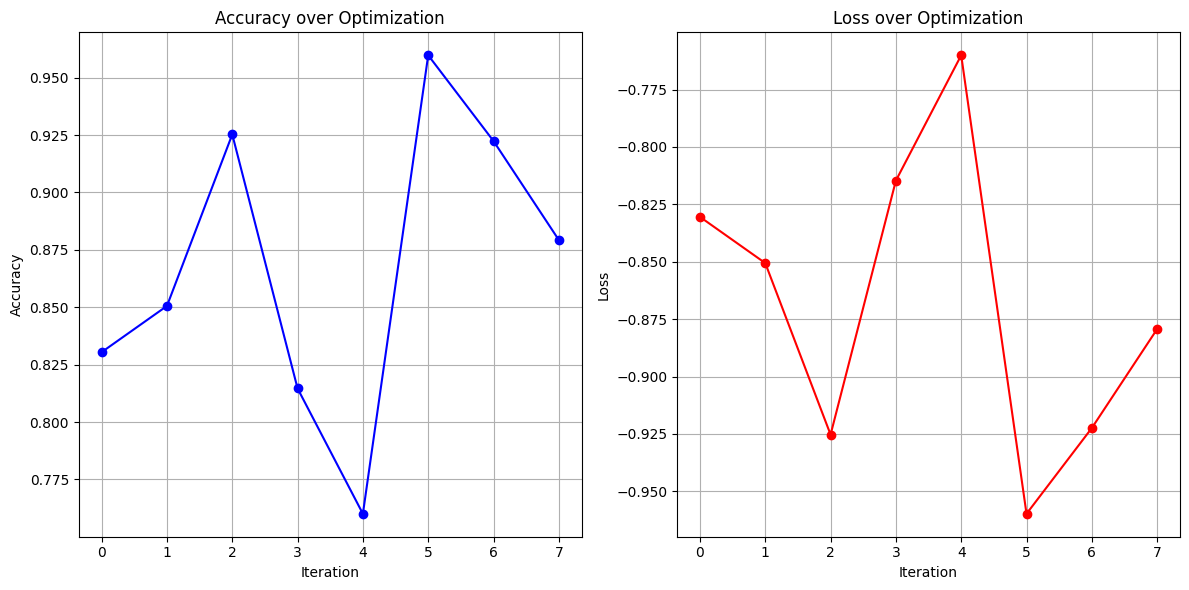

In [ ]:
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss selama optimisasi
iterations = []
accuracies = []
losses = []

for i, res in enumerate(optimizer.res):
    iterations.append(i)
    accuracies.append(res['target'])
    # BayesOpt tidak meminimalkan loss, maka diambil nilai negatif
    losses.append(-res['target'])

# Membuat plot akurasi
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

# Membuat plot loss
plt.subplot(122)
plt.plot(iterations, losses, marker='o', linestyle='-', color='r')
plt.title('Loss over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Train the model using the best hyperparameters
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=int(best_params['filters']), kernel_size=int(best_params['kernel_size']), activation='relu', input_shape=(X.shape[1], X.shape[2])))
cnn_model.add(Conv1D(filters=int(best_params['filters']/2), kernel_size=int(best_params['kernel_size']/2), activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(int(best_params['dense_units']), activation='relu'))
cnn_model.add(Dropout(best_params['dropout_rate']))
cnn_model.add(Dense(no_classes, activation='softmax'))

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#, callbacks=[early_stop]

# Train the model
best_history = cnn_model.fit(X_train, y_train, epochs=200, batch_size=300, validation_data=(X_train, y_train))


Epoch 1/200
10/10 [==============================] - 3s 80ms/step - loss: 2.1291 - accuracy: 0.1263 - val_loss: 1.9799 - val_accuracy: 0.2061
Epoch 2/200
10/10 [==============================] - 1s 54ms/step - loss: 1.9208 - accuracy: 0.2223 - val_loss: 1.6970 - val_accuracy: 0.2856
Epoch 3/200
10/10 [==============================] - 0s 49ms/step - loss: 1.6889 - accuracy: 0.3047 - val_loss: 1.5005 - val_accuracy: 0.3701
Epoch 4/200
10/10 [==============================] - 1s 53ms/step - loss: 1.5254 - accuracy: 0.3863 - val_loss: 1.2698 - val_accuracy: 0.5263
Epoch 5/200
10/10 [==============================] - 0s 50ms/step - loss: 1.3186 - accuracy: 0.4712 - val_loss: 1.0978 - val_accuracy: 0.6014
Epoch 6/200
10/10 [==============================] - 1s 55ms/step - loss: 1.1718 - accuracy: 0.5486 - val_loss: 0.9416 - val_accuracy: 0.6658
Epoch 7/200
10/10 [==============================] - 1s 56ms/step - loss: 1.0761 - accuracy: 0.5759 - val_loss: 0.8288 - val_accuracy: 0.7043
Epoch 

<ipython-input-48-350f4d42c117>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


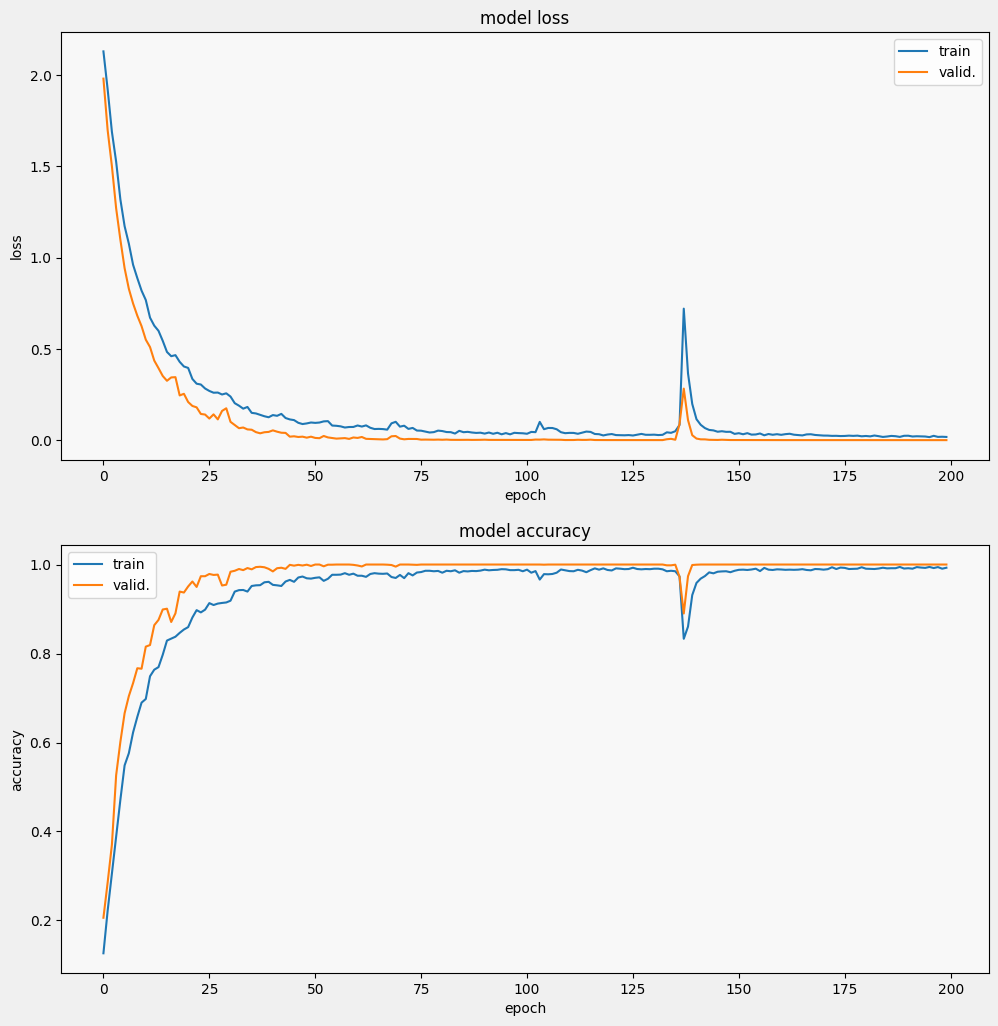

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Display the training curves
display_training_curves(
    best_history.history['loss'],
    best_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    best_history.history['accuracy'],
    best_history.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
X_val.shape

(696, 1000, 1)

22/22 [==============================] - 0s 3ms/step


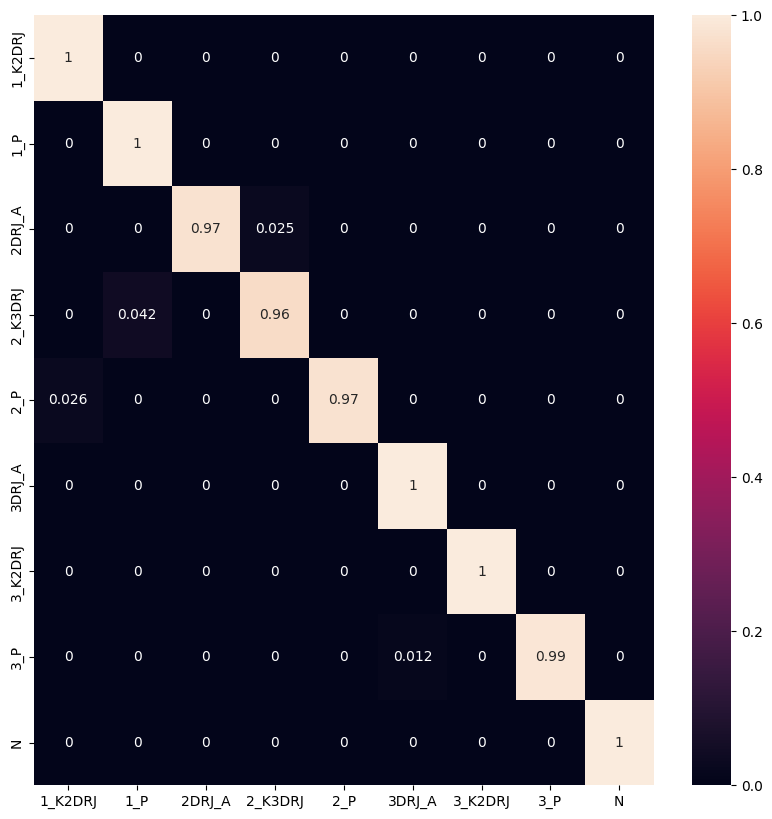

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

# Perform predictions on the validation data
y_pred = cnn_model.predict(X_val)

# Inverse transform the results to obtain class labels
Y_pred = y_pred.argmax(axis=1)
Y_val = y_val.argmax(axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_val, Y_pred, normalize='true')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data validasi
y_pred = cnn_model.predict(X_val)

# Menampilkan classification report
print(classification_report(Y_val, Y_pred))

22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       0.97      1.00      0.98        84
           2       1.00      0.97      0.99        79
           3       0.97      0.96      0.97        72
           4       1.00      0.97      0.99        78
           5       0.99      1.00      0.99        81
           6       1.00      1.00      1.00        60
           7       1.00      0.99      0.99        85
           8       1.00      1.00      1.00        76

    accuracy                           0.99       696
   macro avg       0.99      0.99      0.99       696
weighted avg       0.99      0.99      0.99       696



In [ ]:
from tensorflow.keras import Model
dummy_ann = Model(inputs=cnn_model.input,outputs=cnn_model.layers[-2].output)
y_viz = dummy_ann.predict(X_train)

87/87 [==============================] - 0s 2ms/step


In [ ]:
y_viz.shape

(2780, 84)

In [ ]:
def T_SNE_plot(X_train,y_train,model,encoder):

    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train)

    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

22/22 [==============================] - 0s 2ms/step
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 696 samples in 0.001s...
[t-SNE] Computed neighbors for 696 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 696 / 696
[t-SNE] Mean sigma: 12.420302
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.912457
[t-SNE] KL divergence after 300 iterations: 0.390313


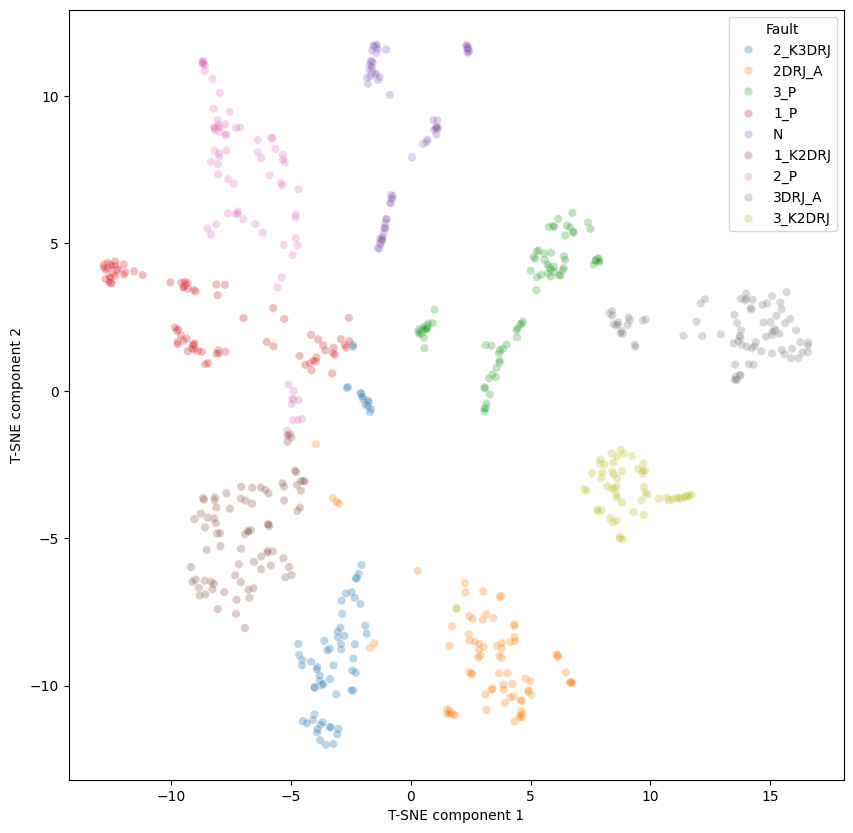

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model telah disimpan sebagai 'model_cnn.h5'


In [ ]:
T_SNE_plot(X_val,y_val,cnn_model,encoder)

cnn_model.save('/content/drive/MyDrive/Skripsi_naufal/WIN1000_1DCNN_200ep.h5')
print("Model telah disimpan sebagai 'model_cnn.h5'")

# Klasifikasi menggunakan 1D CNN 250 epoch



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Skripsi_naufal/data_train.csv')
df

,data,fault
0,-0.08,1_P
1,-0.15,1_P
2,-0.15,1_P
3,-0.15,1_P
4,0.00,1_P
...,...,...
182572,-0.38,N
182573,-0.11,N
182574,-0.11,N
182575,-0.11,N


In [ ]:
# Count the occurrences of each class in the 'fault' column
class_counts = df['fault'].value_counts()

# Print the counts
print(class_counts)

2_K3DRJ    20593
2DRJ_A     20411
3DRJ_A     20398
1_P        20314
3_K2DRJ    20217
2_P        20216
N          20192
3_P        20131
1_K2DRJ    20105
Name: fault, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182577 entries, 0 to 182576
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    182577 non-null  float64
 1   fault   182577 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


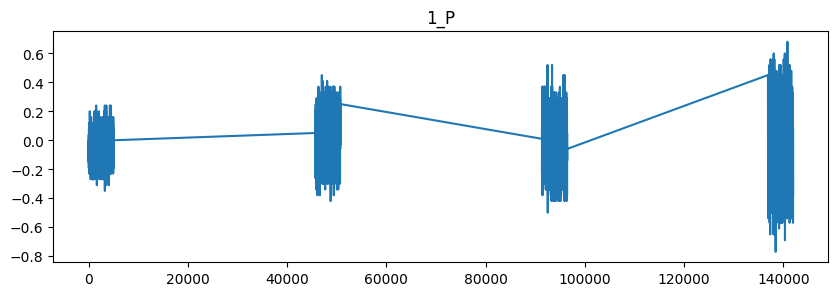

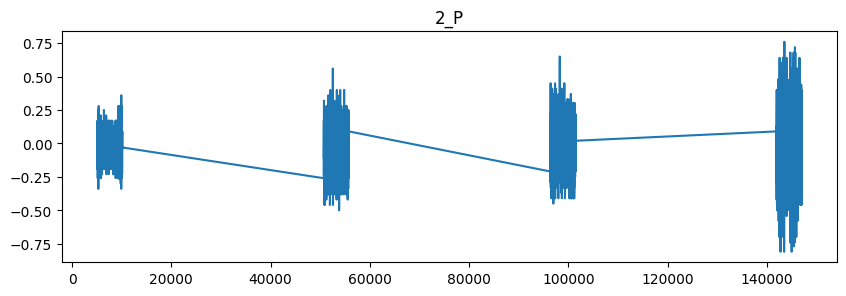

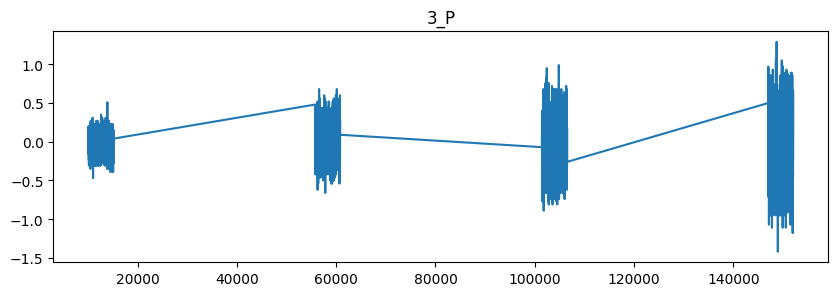

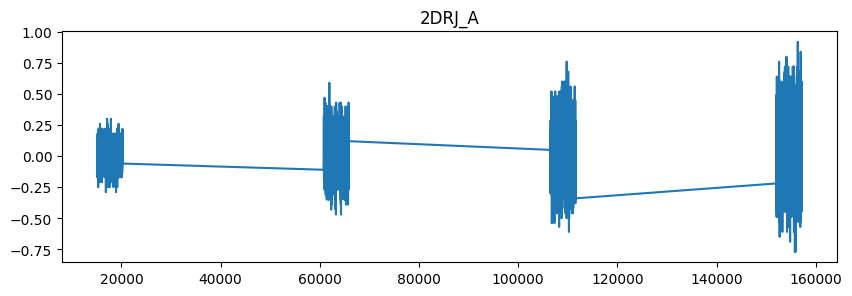

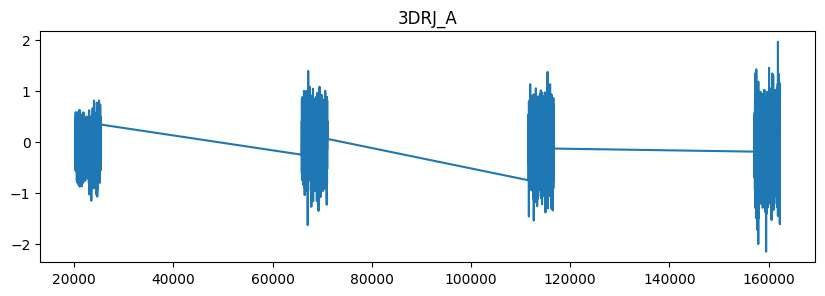

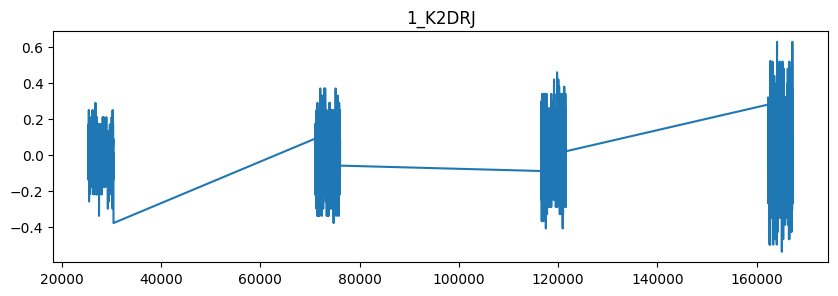

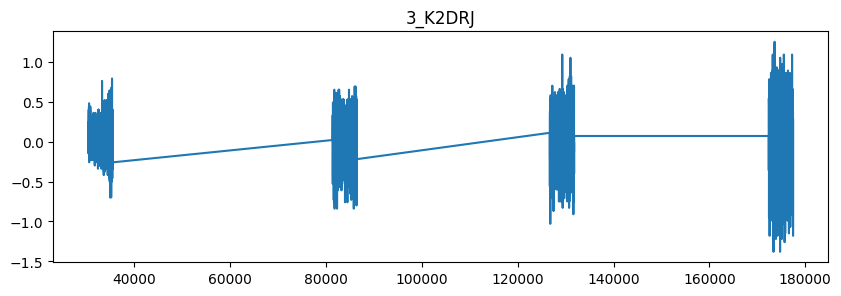

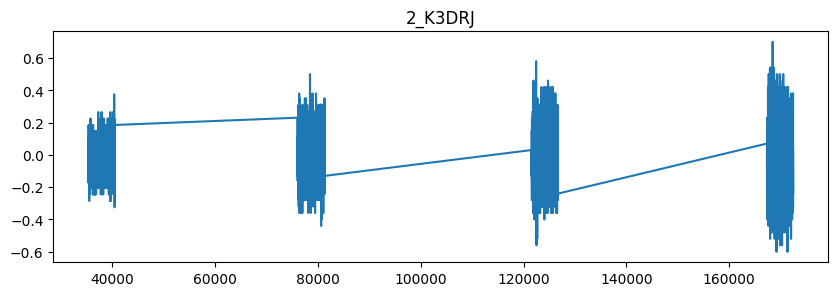

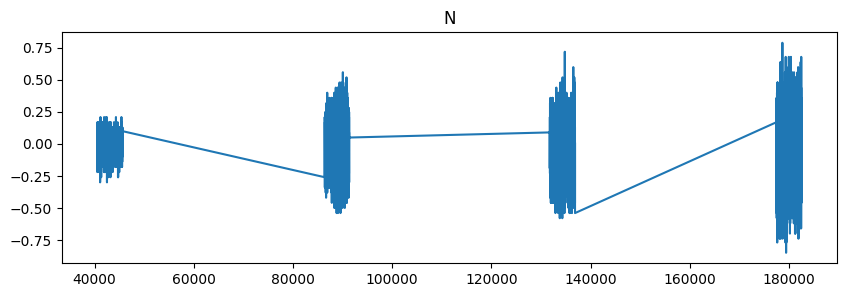

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [ ]:
faults = df['data'].unique()

# menampilkan nilai unik pada kolom 'fault'
print(faults)

[-0.08  -0.15   0.    -0.04   0.04  -0.19   0.08   0.12  -0.11  -0.23
  0.2    0.16  -0.27   0.24  -0.31  -0.35   0.01   0.09  -0.03  -0.07
  0.13   0.17   0.05  -0.26  -0.11   0.25  -0.34   0.28   0.21  -0.3
  0.36   0.2   -0.16  -0.12   0.16   0.12  -0.24  -0.28  -0.2    0.23
  0.27   0.31  -0.47   0.35   0.51  -0.39  -0.1    0.06  -0.02  -0.17
 -0.06   0.02   0.1    0.14   0.18  -0.14  -0.25   0.22  -0.21   0.26
 -0.29   0.3   -0.05   0.46  -0.09   0.07  -0.13   0.03  -0.33  -0.56
  0.58  -0.01   0.34   0.15   0.38  -0.36   0.11  -0.44  -0.4   -0.76
 -0.52  -0.8   -0.6   -0.64  -0.72  -0.84   0.62  -0.48  -0.87  -0.68
  0.42   0.5    0.54  -1.03  -1.15   0.66  -0.91   0.81   0.77  -0.95
 -1.07   0.73   0.01  -0.03  -0.14  -0.07   0.13   0.05  -0.1   -0.26
 -0.22   0.09  -0.18   0.29  -0.34  -0.3   -0.38   0.4    0.44   0.48
  0.32   0.76  -0.42  -0.38   0.52   0.6    0.64  -0.46  -0.5   -0.7
  0.56   0.68   0.79  -0.055 -0.175 -0.015  0.105 -0.095  0.185  0.065
  0.025 -0.135  0.145

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=50

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))

encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)


In [ ]:
print(encoded_Y)
print(Y)

[1 1 1 ... 8 8 8]
['1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '1_P', '

In [ ]:
X.shape

(3476, 1000, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [ ]:
X_train.shape

(2780, 1000, 1)

In [ ]:
X_val.shape

(696, 1000, 1)

In [ ]:
y_train.shape

(2780, 9)

In [ ]:
y_val.shape

(696, 9)

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the number of classes
no_classes = len(df['fault'].unique())

# Define the search space
pbounds = {'filters': (16, 128),
           'kernel_size': (10, 100),
           'dense_units': (10, 200),
           'dropout_rate': (0.1, 0.5)}

# Define the objective function
def cnn_objective(filters, kernel_size, dense_units, dropout_rate):
    # Create the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=int(filters), kernel_size=int(kernel_size), activation='relu', input_shape=(X.shape[1], X.shape[2])))
    cnn_model.add(Conv1D(filters=int(filters/2), kernel_size=int(kernel_size/2), activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=4))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(int(dense_units), activation='relu'))
    cnn_model.add(Dropout(dropout_rate))
    cnn_model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=300, validation_data=(X_train, y_train), callbacks=[EarlyStopping(patience=3)])

    # Evaluate the model
    loss, accuracy = cnn_model.evaluate(X_val, y_val)


    return accuracy

# Create the Bayesian optimizer
optimizer = BayesianOptimization(f=cnn_objective, pbounds=pbounds, random_state=1)

# Run the optimization
optimizer.maximize(n_iter=3)

# Get the best hyperparameters and iteration
best_params = optimizer.max['params']
best_iteration = optimizer.max['target']

print('Best hyperparameters:', best_params)
print('Best iteration:', best_iteration)


|   iter    |  target   | dense_... | dropou... |  filters  | kernel... |
-------------------------------------------------------------------------
Epoch 1/50
10/10 [==============================] - 9s 126ms/step - loss: 2.1473 - accuracy: 0.1097 - val_loss: 2.0975 - val_accuracy: 0.1104
Epoch 2/50
10/10 [==============================] - 0s 29ms/step - loss: 2.0778 - accuracy: 0.1162 - val_loss: 2.0203 - val_accuracy: 0.1525
Epoch 3/50
10/10 [==============================] - 0s 25ms/step - loss: 1.9973 - accuracy: 0.1701 - val_loss: 1.9081 - val_accuracy: 0.1827
Epoch 4/50
10/10 [==============================] - 0s 30ms/step - loss: 1.8527 - accuracy: 0.2658 - val_loss: 1.6832 - val_accuracy: 0.3194
Epoch 5/50
10/10 [==============================] - 0s 33ms/step - loss: 1.6394 - accuracy: 0.3493 - val_loss: 1.4191 - val_accuracy: 0.5273
Epoch 6/50
10/10 [==============================] - 0s 23ms/step - loss: 1.4663 - accuracy: 0.4194 - val_loss: 1.2744 - val_accuracy: 0.5637
Epoch

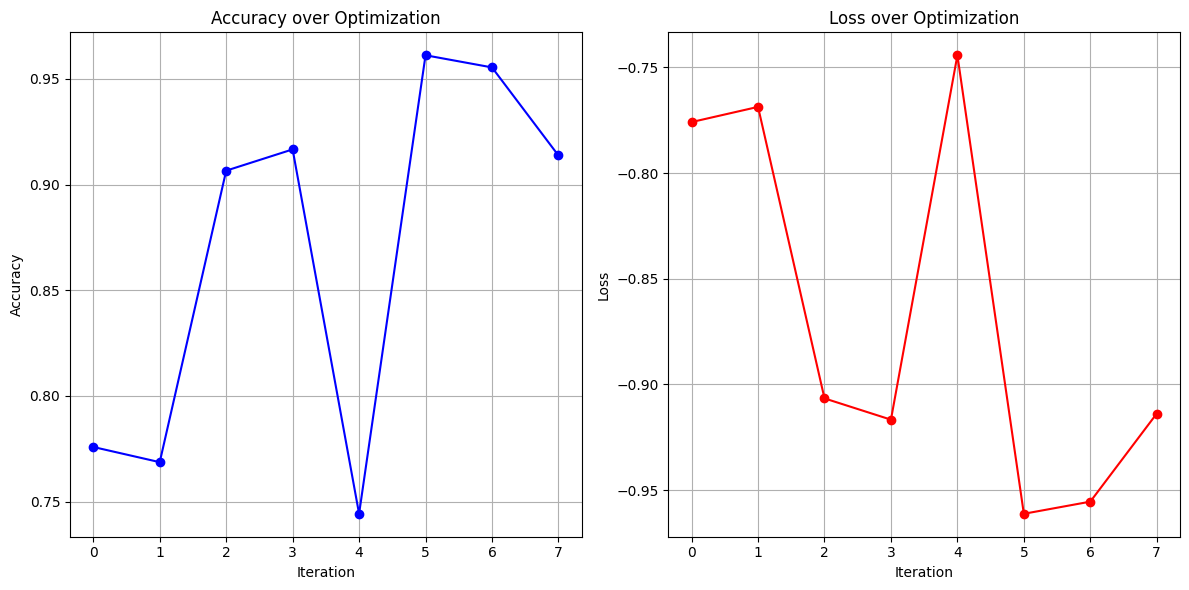

In [ ]:
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss selama optimisasi
iterations = []
accuracies = []
losses = []

for i, res in enumerate(optimizer.res):
    iterations.append(i)
    accuracies.append(res['target'])
    # BayesOpt tidak meminimalkan loss, maka diambil nilai negatif
    losses.append(-res['target'])

# Membuat plot akurasi
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

# Membuat plot loss
plt.subplot(122)
plt.plot(iterations, losses, marker='o', linestyle='-', color='r')
plt.title('Loss over Optimization')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Train the model using the best hyperparameters
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=int(best_params['filters']), kernel_size=int(best_params['kernel_size']), activation='relu', input_shape=(X.shape[1], X.shape[2])))
cnn_model.add(Conv1D(filters=int(best_params['filters']/2), kernel_size=int(best_params['kernel_size']/2), activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(int(best_params['dense_units']), activation='relu'))
cnn_model.add(Dropout(best_params['dropout_rate']))
cnn_model.add(Dense(no_classes, activation='softmax'))

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#, callbacks=[early_stop]

# Train the model
best_history = cnn_model.fit(X_train, y_train, epochs=250, batch_size=300, validation_data=(X_train, y_train))


Epoch 1/250
10/10 [==============================] - 3s 111ms/step - loss: 2.1424 - accuracy: 0.1119 - val_loss: 2.0034 - val_accuracy: 0.1583
Epoch 2/250
10/10 [==============================] - 0s 51ms/step - loss: 1.9361 - accuracy: 0.2158 - val_loss: 1.7112 - val_accuracy: 0.3460
Epoch 3/250
10/10 [==============================] - 1s 56ms/step - loss: 1.6970 - accuracy: 0.3496 - val_loss: 1.4365 - val_accuracy: 0.5011
Epoch 4/250
10/10 [==============================] - 1s 56ms/step - loss: 1.4608 - accuracy: 0.4417 - val_loss: 1.1891 - val_accuracy: 0.5838
Epoch 5/250
10/10 [==============================] - 1s 53ms/step - loss: 1.2926 - accuracy: 0.5072 - val_loss: 1.0125 - val_accuracy: 0.6576
Epoch 6/250
10/10 [==============================] - 1s 62ms/step - loss: 1.1684 - accuracy: 0.5482 - val_loss: 0.9004 - val_accuracy: 0.6939
Epoch 7/250
10/10 [==============================] - 1s 61ms/step - loss: 1.0644 - accuracy: 0.5817 - val_loss: 0.8110 - val_accuracy: 0.7367
Epoch

<ipython-input-28-350f4d42c117>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


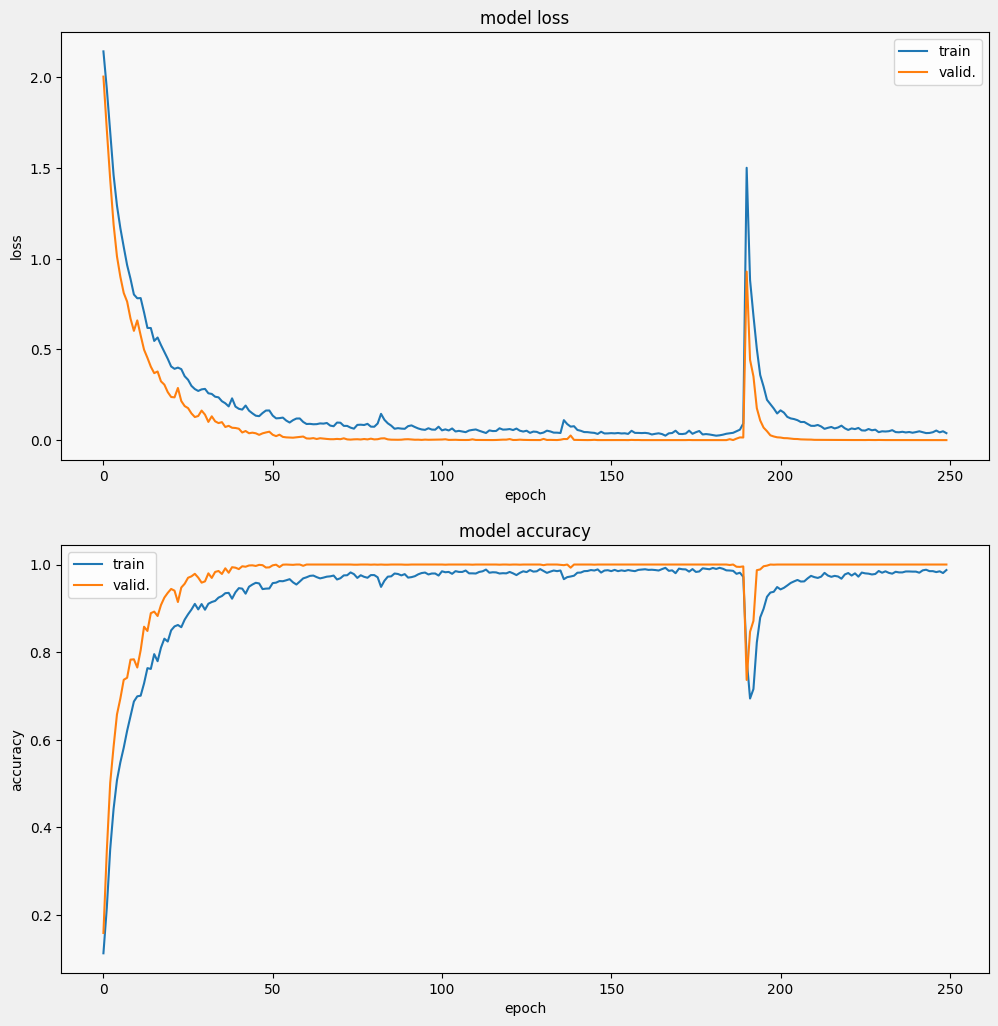

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Display the training curves
display_training_curves(
    best_history.history['loss'],
    best_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    best_history.history['accuracy'],
    best_history.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
X_val.shape

(696, 1000, 1)

22/22 [==============================] - 0s 3ms/step


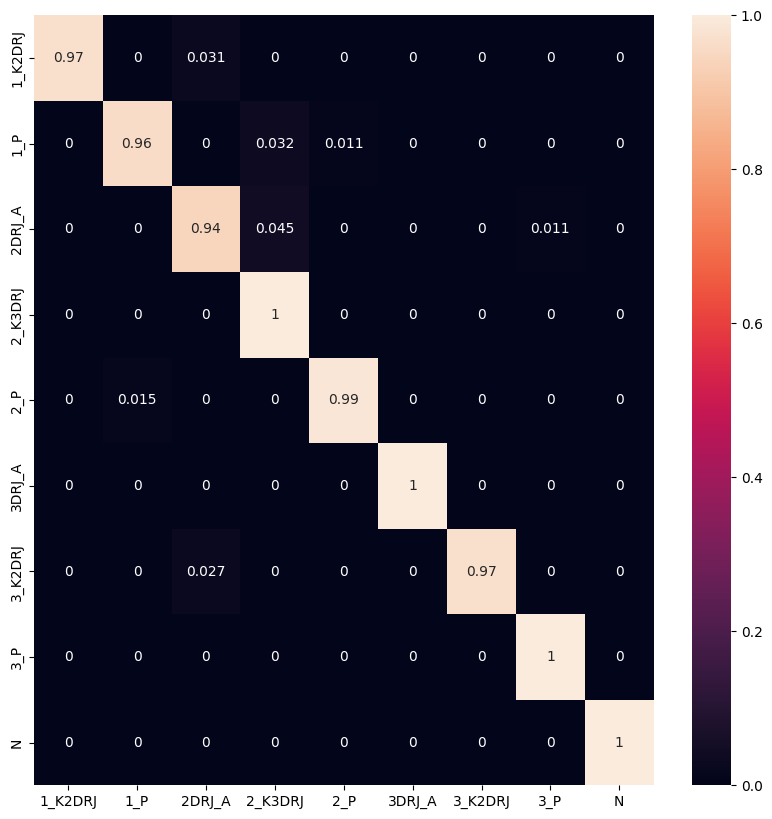

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

# Perform predictions on the validation data
y_pred = cnn_model.predict(X_val)

# Inverse transform the results to obtain class labels
Y_pred = y_pred.argmax(axis=1)
Y_val = y_val.argmax(axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_val, Y_pred, normalize='true')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data validasi
y_pred = cnn_model.predict(X_val)

# Menampilkan classification report
print(classification_report(Y_val, Y_pred))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.99      0.96      0.97        94
           2       0.95      0.94      0.95        88
           3       0.93      1.00      0.96        87
           4       0.99      0.99      0.99        68
           5       1.00      1.00      1.00        81
           6       1.00      0.97      0.99        73
           7       0.98      1.00      0.99        63
           8       1.00      1.00      1.00        77

    accuracy                           0.98       696
   macro avg       0.98      0.98      0.98       696
weighted avg       0.98      0.98      0.98       696



In [ ]:
from tensorflow.keras import Model
dummy_ann = Model(inputs=cnn_model.input,outputs=cnn_model.layers[-2].output)
y_viz = dummy_ann.predict(X_train)

87/87 [==============================] - 0s 3ms/step


In [ ]:
y_viz.shape

(2780, 84)

In [ ]:
def T_SNE_plot(X_train,y_train,model,encoder):

    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train)

    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

22/22 [==============================] - 0s 2ms/step
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 696 samples in 0.001s...
[t-SNE] Computed neighbors for 696 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 696 / 696
[t-SNE] Mean sigma: 10.570529
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.020653
[t-SNE] KL divergence after 300 iterations: 0.389174


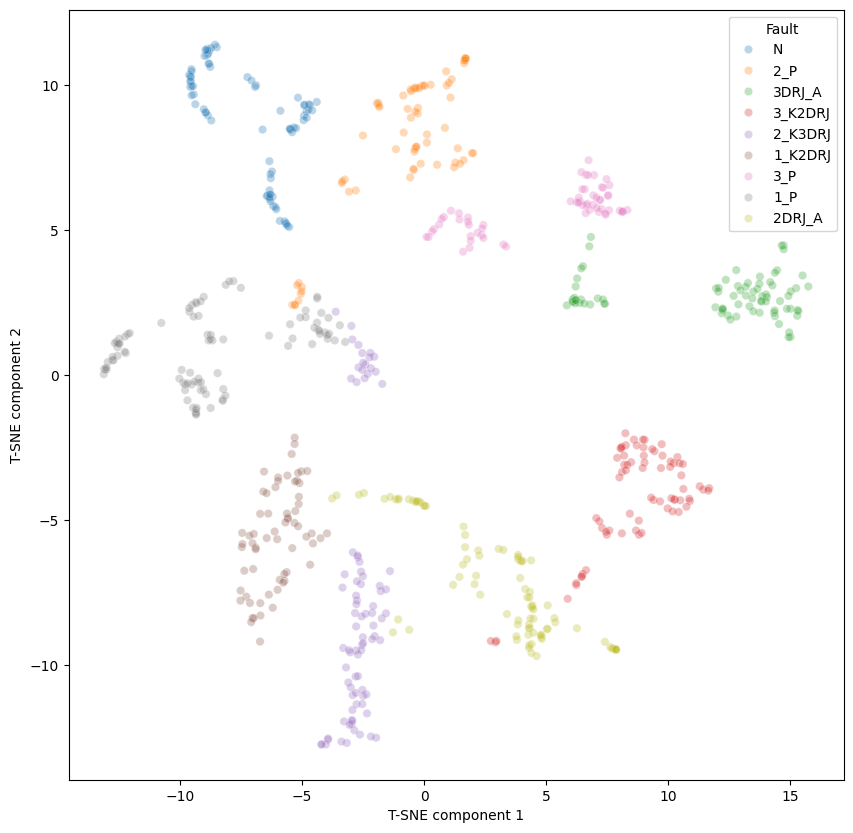

Model telah disimpan sebagai 'model_cnn.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
T_SNE_plot(X_val,y_val,cnn_model,encoder)

cnn_model.save('/content/drive/MyDrive/Skripsi_naufal/WIN1000_1DCNN_250ep.h5')
print("Model telah disimpan sebagai 'model_cnn.h5'")

# uji model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import tensorflow as tf

# Load Model
tf.config.run_functions_eagerly(True) # Aktifkan eager execution secara global
model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi_naufal/WIN1000_1DCNN3.h5')# Ganti dengan nama dan path file model Anda

In [ ]:
# Define Directory
directory = '/content/drive/MyDrive/Skripsi_naufal/data_uji/win_1000' # Ganti dengan path direktori Anda

In [ ]:
excel_files = []
for filename in os.listdir(directory):
    if filename.endswith("ujiangular.xlsx") or filename.endswith("ujiangular.xls"):
        excel_files.append(os.path.join(directory, filename))

###UJI


### Paralel

In [ ]:
data = pd.DataFrame()
for excel_file in excel_files:
 df = pd.read_excel(excel_file, sheet_name='Sheet3') # Ganti dengan nama sheet yang sesuai
 data = pd.concat([data, df], ignore_index=True)


In [ ]:
# Kolom yang perlu diubah menjadi float
kolom_yang_perlu_diubah = ['data']

In [ ]:
# Periksa apakah kolom yang perlu diubah ada dalam DataFrame
kolom_tersedia = data.columns.tolist()
for kolom in kolom_yang_perlu_diubah:
  if kolom not in df.columns:
    raise KeyError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")
data[kolom_yang_perlu_diubah] = data[kolom_yang_perlu_diubah].astype(float) # Ubah tipe data menjadi float

In [ ]:
import numpy as np
# Ubah bentuk data menjadi (jumlah_sampel, panjang_sequence, jumlah_fitur)
def predict_prob(number):
  return [number[0],1-number[0]]

data = np.expand_dims(data, axis=-1)
data = data.reshape(-1, 1000, 1) # Mengubah dimensi data

predicted_probabilities = np.array(list(map(predict_prob, model.predict(data))))

predictions = model.predict(data)
predicted_labels = np.argmax(predictions, axis=1)

# print(predicted_probabilities[0][1])
# print(predicted_labels)

for label in predicted_labels:
 if label in [1,4,7]:
  print("Terdeteksi missalignment paralel")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [2,5]:
  print("Terdeteksi missalignment angular")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [0,3,6]:
  print("Terdeteksi missalignment kombinasi")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [8]:
  print("Terdeteksi Normal")
  print("Probabilitas: ",predicted_probabilities[0][1])
 else:
  print("Kerusakan lain yang tidak teridentifikasi")

  print("Probabilitas: ",predicted_probabilities[0][1])

### Angular

In [ ]:
data = pd.DataFrame()
for excel_file in excel_files:
 df = pd.read_excel(excel_file, sheet_name='Sheet1') # Ganti dengan nama sheet yang sesuai
 data = pd.concat([data, df], ignore_index=True)


In [ ]:
# Kolom yang perlu diubah menjadi float
kolom_yang_perlu_diubah = ['data']

In [ ]:
# Periksa apakah kolom yang perlu diubah ada dalam DataFrame
kolom_tersedia = data.columns.tolist()
for kolom in kolom_yang_perlu_diubah:
  if kolom not in df.columns:
    raise KeyError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")
data[kolom_yang_perlu_diubah] = data[kolom_yang_perlu_diubah].astype(float)  # Ubah tipe data menjadi float

In [ ]:
import numpy as np
# Ubah bentuk data menjadi (jumlah_sampel, panjang_sequence, jumlah_fitur)
def predict_prob(number):
  return [number[0],1-number[0]]

data = np.expand_dims(data, axis=-1)
data = data.reshape(-1, 1000, 1) # Mengubah dimensi data

predicted_probabilities = np.array(list(map(predict_prob, model.predict(data))))

predictions = model.predict(data)
predicted_labels = np.argmax(predictions, axis=1)

# print(predicted_probabilities[0][1])
# print(predicted_labels)

for label in predicted_labels:
 if label in [1,4,7]:
  print("Terdeteksi missalignment paralel")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [2,5]:
  print("Terdeteksi missalignment angular")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [0,3,6]:
  print("Terdeteksi missalignment kombinasi")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [8]:
  print("Terdeteksi Normal")
  print("Probabilitas: ",predicted_probabilities[0][1])
 else:
  print("Kerusakan lain yang tidak teridentifikasi")

  print("Probabilitas: ",predicted_probabilities[0][1])

### Kombinasi

In [ ]:
data = pd.DataFrame()
for excel_file in excel_files:
 df = pd.read_excel(excel_file, sheet_name='Sheet8') # Ganti dengan nama sheet yang sesuai
 data = pd.concat([data, df], ignore_index=True)


In [ ]:
# Kolom yang perlu diubah menjadi float
kolom_yang_perlu_diubah = ['data']

In [ ]:
# Periksa apakah kolom yang perlu diubah ada dalam DataFrame
kolom_tersedia = data.columns.tolist()
for kolom in kolom_yang_perlu_diubah:
  if kolom not in df.columns:
    raise KeyError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")
data[kolom_yang_perlu_diubah] = data[kolom_yang_perlu_diubah].astype(float) # Ubah tipe data menjadi float

In [ ]:
import numpy as np
# Ubah bentuk data menjadi (jumlah_sampel, panjang_sequence, jumlah_fitur)
def predict_prob(number):
  return [number[0],1-number[0]]

data = np.expand_dims(data, axis=-1)
data = data.reshape(-1, 1000, 1) # Mengubah dimensi data

predicted_probabilities = np.array(list(map(predict_prob, model.predict(data))))

predictions = model.predict(data)
predicted_labels = np.argmax(predictions, axis=1)

# print(predicted_probabilities[0][1])
# print(predicted_labels)
for label in predicted_labels:
 if label in [1,4,7]:
  print("Terdeteksi missalignment paralel")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [2,5]:
  print("Terdeteksi missalignment angular")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [0,3,6]:
  print("Terdeteksi missalignment kombinasi")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [8]:
  print("Terdeteksi Normal")
  print("Probabilitas: ",predicted_probabilities[0][1])
 else:
  print("Kerusakan lain yang tidak teridentifikasi")

  print("Probabilitas: ",predicted_probabilities[0][1])

### Normal

In [ ]:
data = pd.DataFrame()
for excel_file in excel_files:
 df = pd.read_excel(excel_file, sheet_name='Sheet8') # Ganti dengan nama sheet yang sesuai
 data = pd.concat([data, df], ignore_index=True)


In [ ]:
# Kolom yang perlu diubah menjadi float
kolom_yang_perlu_diubah = ['data']

In [ ]:
# Periksa apakah kolom yang perlu diubah ada dalam DataFrame
kolom_tersedia = data.columns.tolist()
for kolom in kolom_yang_perlu_diubah:
  if kolom not in df.columns:
    raise KeyError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")
data[kolom_yang_perlu_diubah] = data[kolom_yang_perlu_diubah].astype(float) # Ubah tipe data menjadi float

In [ ]:
import numpy as np
# Ubah bentuk data menjadi (jumlah_sampel, panjang_sequence, jumlah_fitur)
def predict_prob(number):
  return [number[0],1-number[0]]

data = np.expand_dims(data, axis=-1)
data = data.reshape(-1, 1000, 1) # Mengubah dimensi data

predicted_probabilities = np.array(list(map(predict_prob, model.predict(data))))

predictions = model.predict(data)
predicted_labels = np.argmax(predictions, axis=1)

# print(predicted_probabilities[0][1])
# print(predicted_labels)

for label in predicted_labels:
 if label in [1,4,7]:
  print("Terdeteksi missalignment paralel")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [2,5]:
  print("Terdeteksi missalignment angular")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [0,3,6]:
  print("Terdeteksi missalignment kombinasi")
  print("Probabilitas: ",predicted_probabilities[0][1])
 elif label in [8]:
  print("Terdeteksi Normal")
  print("Probabilitas: ",predicted_probabilities[0][1])
 else:
  print("Kerusakan lain yang tidak teridentifikasi")

  print("Probabilitas: ",predicted_probabilities[0][1])